In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib     
import time
import scipy.signal as signal
import os
import seaborn as sns
import latex

matplotlib.rcParams.update(matplotlib.rcParamsDefault)


matplotlib.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Palatino",
    "font.size": 32,
    "legend.fontsize": 20,
    'legend.title_fontsize': 32,

    #"axes.formatter.use_mathtext": True
})

matplotlib.rc('axes', titlesize=32)



from scanf import scanf

%matplotlib inline

In [2]:
path = '/Users/karol/Library/CloudStorage/OneDrive-AkademiaGórniczo-Hutniczaim.StanisławaStaszicawKrakowie/Praca magisterska - Memrystory/Pomiary programowania/Pomiary ver 1'
dir_list = os.listdir(path)
datas = []
for file in dir_list:
    filepath = os.path.join(path, file)
    data = pd.read_csv(filepath)
    data.columns = ["Time", "Pulses", "Tests",'R','isSucces','dt_Ron',
                    'Amp_Ron', 'q', 'E_memristor', 'State']
    data_from_file = scanf('Programowanie_Ron_wyniki_AmpOn=%f_dtOn=%f_memNumber%d.csv',file)
    data['Test_Amp'] = data_from_file[0]; data['Test_dt'] = data_from_file[1]
    if data_from_file[2] == 1:
        data['Dopant'] = 'Tungsten'
    elif data_from_file[2] == 2:
        data['Dopant'] = 'Tin'
    elif data_from_file[2] == 3:
        data['Dopant'] = 'Chromium'
    else:
        data['Dopant'] = 'Carbon'
        
    datas.append(data)
    
    
concat_data = pd.concat(datas, axis=0,ignore_index=True)
concat_data


,Time,Pulses,Tests,R,isSucces,dt_Ron,Amp_Ron,q,E_memristor,State,Test_Amp,Test_dt,Dopant
0,1.681775e+09,0,0,55.613912,False,0.10,-2.5,-0.010778,0.020878,R_off,2.0,0.10,Tin
1,1.681775e+09,1,0,1.015113,True,0.10,2.0,0.033952,0.008890,R_on,2.0,0.10,Tin
2,1.681775e+09,0,0,32.196201,False,0.10,-2.5,-0.011636,0.021155,R_off,2.0,0.10,Tin
3,1.681775e+09,1,1,1.061309,True,0.10,2.0,0.033879,0.009060,R_on,2.0,0.10,Tin
4,1.681775e+09,0,1,44.006171,False,0.10,-2.5,-0.011273,0.020816,R_off,2.0,0.10,Tin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11420,1.682082e+09,0,97,567.730547,False,0.10,-2.5,-0.001556,0.002738,R_off,1.5,0.05,Carbon
11421,1.682082e+09,1,98,27.26668,True,0.05,1.5,0.001273,0.000368,R_on,1.5,0.05,Carbon
11422,1.682082e+09,0,98,505.0866,False,0.10,-2.5,-0.001485,0.002662,R_off,1.5,0.05,Carbon
11423,1.682082e+09,1,99,346.427112,False,0.05,1.5,0.001288,0.000355,R_off,1.5,0.05,Carbon


In [3]:
data.head()
data.isSucces = data["State"]=='R_on'



data[1]

KeyError: 1

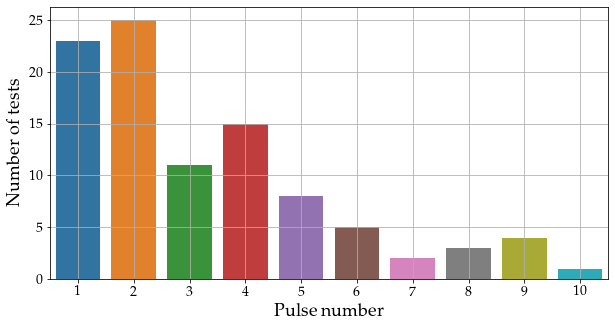

In [75]:
filter = np.logical_and(concat_data['Test_dt'] == 0.005, concat_data['Test_Amp'] == 1)
filter = np.logical_and(filter, concat_data['Dopant'] == 'Tin')


data = concat_data[filter]
temp_data = data[data["isSucces"]==True].groupby(by="Pulses").count()
plt.figure(figsize=(10,5))
sns.barplot( x=temp_data.index, y="R", data=temp_data)
plt.xlabel("Pulse number", fontsize=18)
plt.ylabel("Number of tests", fontsize= 18)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.grid(True)
plt.savefig('bar_of_1test.pdf',bbox_inches='tight')
plt.show()





In [3]:
concat_data['Q_integrated'] = np.nan
concat_data['E_integrated'] = np.nan



for i in concat_data.index:
    if concat_data.loc[i,"Pulses"] == 0:
        concat_data.loc[i,"Q_integrated"] = 0
    else:
        concat_data.loc[i,"Q_integrated"] = concat_data.loc[i-1,"Q_integrated"]+concat_data.loc[i,"q"]
    if concat_data.loc[i,"Pulses"] == 0:
        concat_data.loc[i,"E_integrated"] = 0
    else:
        concat_data.loc[i,"E_integrated"] = concat_data.loc[i-1,"E_integrated"]+concat_data.loc[i,"E_memristor"]

concat_data['Q_integrated']





0        0.000000
1        0.033952
2        0.000000
3        0.033879
4        0.000000
           ...   
11420    0.000000
11421    0.001273
11422    0.000000
11423    0.001288
11424    0.002554
Name: Q_integrated, Length: 11425, dtype: float64

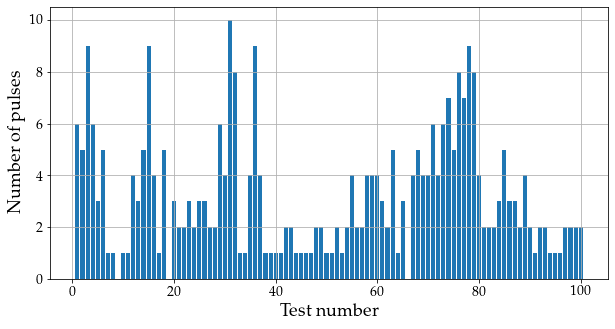

In [76]:
temp_data = data[data["isSucces"]==True]
plt.figure(figsize=(10,5))
plt.bar( x = temp_data['Tests']+1, height= temp_data["Pulses"], width=0.8)
#sns.bar(x=temp_data["Tests"], height=temp_data["Q_integrated"],width=0.8)
plt.xlabel("Test number",fontsize=18)
plt.ylabel('Number of pulses',fontsize=18)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)

plt.grid(True)
plt.savefig('hist_of_1test_pulses.pdf',bbox_inches='tight' )


In [72]:
data[data["isSucces"]==True].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 4722 to 5165
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time          97 non-null     float64
 1   Pulses        97 non-null     int64  
 2   Tests         97 non-null     int64  
 3   R             97 non-null     object 
 4   isSucces      97 non-null     bool   
 5   dt_Ron        97 non-null     float64
 6   Amp_Ron       97 non-null     float64
 7   q             97 non-null     float64
 8   E_memristor   97 non-null     float64
 9   State         97 non-null     object 
 10  Test_Amp      97 non-null     float64
 11  Test_dt       97 non-null     float64
 12  Dopant        97 non-null     object 
 13  Q_integrated  97 non-null     float64
 14  E_integrated  97 non-null     float64
dtypes: bool(1), float64(9), int64(2), object(3)
memory usage: 11.5+ KB


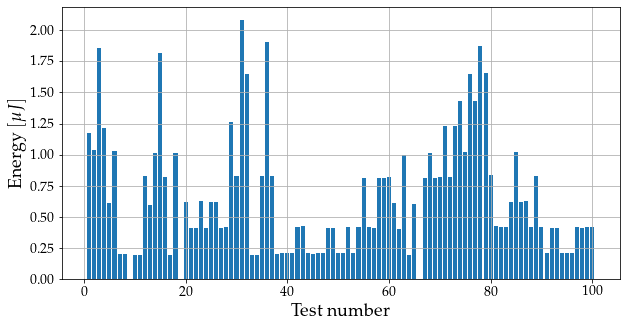

In [77]:

temp_data = data[data["isSucces"]==True]
plt.figure(figsize=(10,5))
plt.bar(x=temp_data["Tests"]+1, height=(temp_data["E_integrated"]*1000))
plt.xlabel("Test number",fontdict={'fontsize':18})
plt.ylabel("Energy $[ \mu J ]$",fontdict={'fontsize':18})
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.grid(True)
plt.savefig('hist_of_energy.pdf',bbox_inches='tight' )


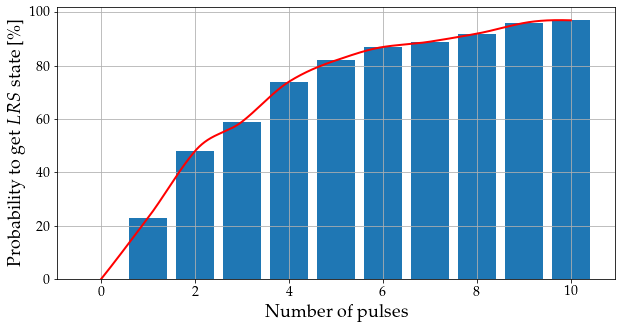

In [93]:
from scipy.interpolate import interp1d, Akima1DInterpolator

number_of_tests = len(data["Tests"].unique())

temp_data = data[data["isSucces"]==True].groupby(by="Pulses",as_index=False).count()
temp_data['Probability'] = np.multiply(temp_data['R'],1/number_of_tests)
temp_data.reset_index(inplace=True)
P = 0
for i in temp_data.index:
    P = temp_data.loc[i,'Probability']+P
    temp_data.loc[i,'Probability'] = P
x = temp_data['Pulses'].to_numpy()
x = np.insert(x,0,0)
y = temp_data['Probability'].to_numpy()
y = np.insert(y,0,0)*100

plt.figure(figsize=(10,5))
plt.bar(x=x, height=y,width=0.8)
plt.xlabel("Number of pulses",fontdict={'fontsize':18})
plt.ylabel("Probability to get $LRS$ state [\%]",fontdict={'fontsize':18})
plt.grid(True)
x_i = np.arange(start= np.min(x),stop= np.max(x),step=0.001)

cs = Akima1DInterpolator(x, y)
plt.plot(x_i, cs(x_i),'r', linewidth=2) 
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.savefig('hist_of_probability.pdf',bbox_inches='tight')


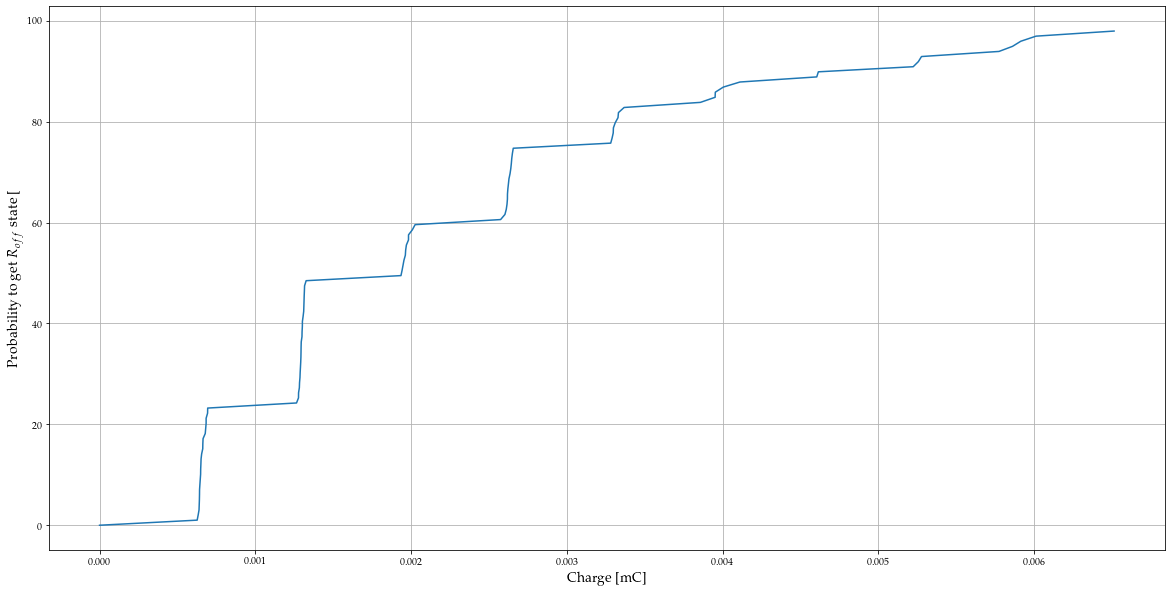

In [106]:

number_of_tests = np.max(data["Tests"])

temp_data = data[data["isSucces"]==True].groupby(by="Q_integrated",as_index=False).count()
temp_data.sort_values(by="Q_integrated",ascending=True,inplace=True)
temp_data.reset_index(drop=True,inplace=True)
temp_data

temp_data['Probability'] = np.multiply(temp_data['R'],1/number_of_tests)
P = 0

for i in temp_data.index:
    P = temp_data.loc[i,'Probability']+P
    temp_data.loc[i,'Probability'] = P

x = temp_data['Q_integrated'].to_numpy()
x = np.insert(x,0,0)
y = temp_data['Probability'].to_numpy()
y = np.insert(y,0,0)*100

plt.figure(figsize=(20,10))
plt.plot(x, y)
plt.xlabel("Charge [mC]",fontdict={'fontsize':14})
plt.ylabel("Probability to get $R_{off}$ state [%]",fontdict={'fontsize':14})
plt.grid(True)
x_i = np.arange(start= np.min(x),stop= np.max(x),step=0.001)

cs = interp1d(x, y,kind='next')


t = data["R"] == "nan"
t = np.where(t==True)
data.iloc[t[0]]
data =data.drop(labels = t[0],axis=0).reset_index(drop=True)
data["R"] = data["R"].astype(np.float64)



#plt.plot(x_i, cs(x_i),'r')




In [ ]:
data

,Time,Pulses,Tests,R,isSucces,dt_Ron,Amp_Ron,q,E_memristor,State,Q_integrated,E_integrated
0,1.681826e+09,0,0,51.123056,False,0.100,-2.5,-0.019993,0.029484,R_off,0.000000,0.000000
1,1.681826e+09,1,0,3.870619,True,0.005,1.0,0.000750,0.000164,R_on,0.000750,0.000164
2,1.681826e+09,0,0,61.118241,False,0.100,-2.5,-0.019741,0.029387,R_off,0.000000,0.000000
3,1.681826e+09,1,1,2.660475,True,0.005,1.0,0.000760,0.000158,R_on,0.000760,0.000158
4,1.681826e+09,0,1,65.887161,False,0.100,-2.5,-0.019548,0.029282,R_off,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
208,1.681827e+09,1,97,2.038553,True,0.005,1.0,0.000756,0.000161,R_on,0.000756,0.000161
209,1.681827e+09,0,97,86.831395,False,0.100,-2.5,-0.018247,0.028549,R_off,0.000000,0.000000
210,1.681827e+09,1,98,1.826422,True,0.005,1.0,0.000761,0.000158,R_on,0.000761,0.000158
211,1.681827e+09,0,98,83.639628,False,0.100,-2.5,-0.018276,0.028563,R_off,0.000000,0.000000


/var/folders/yl/yry63jv13m75yc_y50wzm1kr0000gn/T/ipykernel_4738/2794885704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['R'] = pd.to_numeric(temp_data['R'],errors='coerce')


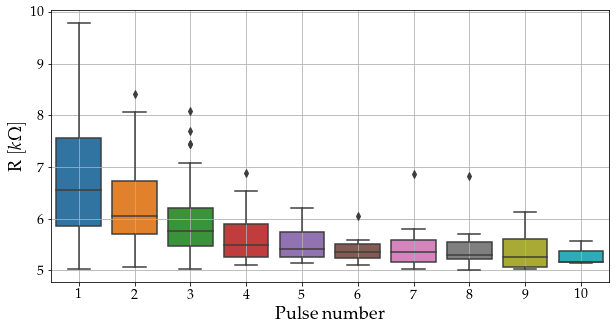

In [105]:
temp_data = data[data['State'] == "Unknown"]
temp_data['R'] = pd.to_numeric(temp_data['R'],errors='coerce')
plt.figure(figsize=(10,5))
sns.boxplot(data=temp_data, x=temp_data["Pulses"],y= temp_data["R"])
plt.xlabel("Pulse number", fontsize=18)
plt.ylabel("R $[k\Omega]$ ", fontsize=18)
plt.grid(True)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.savefig('box_of_probability.pdf',bbox_inches='tight')



#plt.ylim(0,10)

#plt.title('Wartości rezystancji przy stanie "Unknown"', fontsize = 15)
plt.show()



In [97]:
temp_data = data[data['Pulses'] != 0]

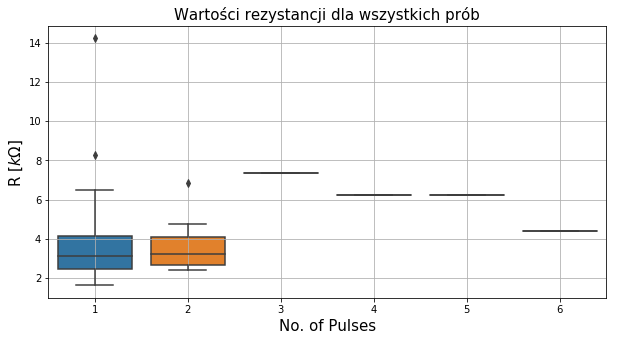

In [ ]:


plt.figure(figsize=(10,5))
sns.boxplot(data=temp_data, x="Pulses",y="R")
plt.xlabel("No. of Pulses", fontsize=15)
plt.ylabel("Number of successful tests to $R_{on}$ state ", fontsize=15)
plt.grid(True)
#plt.ylim((0,800))
plt.ylabel("R $[k\Omega]$ ", fontsize=15)
plt.title("Wartości rezystancji dla wszystkich prób", fontsize=15)
plt.show()
#plt.savefig('histogram.pgf')

In [ ]:
k = np.logical_and( temp_data["Pulses"]>=3, temp_data["R"]>=100 )
k = np.where(k==True)
ind = temp_data.iloc[k[0]].index
temp_data =temp_data.drop(index=ind,axis=0).reset_index(drop=True)
#temp_data.max()


In [4]:
plt.figure(figsize=(10,5))
max = temp_data.groupby('Pulses').max()["R"]
min = temp_data.groupby('Pulses').min()["R"]
plt.fill_between(max.index, max, min, alpha=0.4, color='blue')
plt.xlabel("No. of Pulses", fontsize=15)
plt.ylabel("$Resistance\ [k\Omega]$ ", fontsize=15)
plt.grid(True)
#plt.ylim((0,25))

NameError: name 'temp_data' is not defined

<Figure size 720x360 with 0 Axes>

In [5]:
data[data['State']=="R_off"].min()

Time           1682080932.560158
Pulses                         0
Tests                          0
R                      207.51122
isSucces                   False
dt_Ron                      0.05
Amp_Ron                     -2.5
q                      -0.002546
E_memristor             0.000071
State                      R_off
Test_Amp                     1.5
Test_dt                     0.05
Dopant                    Carbon
dtype: object

In [6]:
temp_data = data[np.  data["isSucces"]==True]
plt.figure(figsize=(20,10))
plt.bar(x=temp_data["Tests"], height=temp_data["Pulses"],width=0.8)
plt.xlabel("No. Tests",fontdict={'fontsize':14})
plt.ylabel("Pulses to get $R_{on}$ state",fontdict={'fontsize':14})
plt.grid(True)




AttributeError: module 'numpy' has no attribute 'data'

In [4]:
grouping = concat_data[concat_data['isSucces'] == True].groupby(['Dopant','Test_Amp', 'Test_dt' ]).mean()
grouping

Time    Pulses      Tests  isSucces  \
Dopant   Test_Amp Test_dt                                                
Carbon   1.0      0.005    1.681898e+09  1.970000  49.500000       1.0   
                  0.010    1.681899e+09  1.750000  49.500000       1.0   
                  0.050    1.681900e+09  1.077922  38.000000       1.0   
                  0.100    1.682077e+09  1.170000  49.500000       1.0   
         1.5      0.005    1.682079e+09  1.510870  50.782609       1.0   
                  0.010    1.682080e+09  1.050000  49.500000       1.0   
                  0.050    1.682081e+09  1.121212  49.444444       1.0   
                  0.100    1.682439e+09  1.030000  49.500000       1.0   
         2.0      0.005    1.681903e+09  1.000000  49.500000       1.0   
                  0.010    1.681903e+09  1.000000  49.500000       1.0   
                  0.050    1.681904e+09  1.000000  49.500000       1.0   
                  0.100    1.681905e+09  1.010000  49.500000       1.0   
Chromium 1.0      0.005    1.681826e+09  1.130000  49.500000       1.0   
                  0.010    1.681827e+09  1.100000  49.500000       1.0   
                  0.050    1.681828e+09  1.040000  49.500000       1.0   
                  0.100    1.681829e+09  1.010000  49.500000       1.0   
         1.5      0.005    1.681829e+09  1.000000  49.500000       1.0   
                  0.010    1.681830e+09  1.000000  49.500000       1.0   
                  0.050    1.681831e+09  1.000000  49.500000       1.0   
                  0.100    1.681832e+09  1.000000  49.500000       1.0   
         2.0      0.005    1.681832e+09  1.000000  49.500000       1.0   
                  0.010    1.681833e+09  1.000000  49.500000       1.0   
                  0.050    1.681834e+09  1.000000  49.500000       1.0   
                  0.100    1.681835e+09  1.000000  49.500000       1.0   
Tin      1.0      0.005    1.681772e+09  3.298969  50.092784       1.0   
                  0.010    1.681769e+09  2.610526  48.905263       1.0   
                  0.050    1.681768e+09  1.430000  49.500000       1.0   
                  0.100    1.681767e+09  1.230000  49.500000       1.0   
         1.5      0.005    1.681771e+09  1.320000  49.500000       1.0   
                  0.010    1.681770e+09  1.150000  49.500000       1.0   
                  0.050    1.681773e+09  1.000000  49.500000       1.0   
                  0.100    1.681773e+09  1.000000  49.500000       1.0   
         2.0      0.005    1.681774e+09  1.000000  49.500000       1.0   
                  0.010    1.681774e+09  1.000000  49.500000       1.0   
                  0.050    1.681775e+09  1.000000  49.500000       1.0   
                  0.100    1.681775e+09  1.000000  49.500000       1.0   
Tungsten 1.0      0.005    1.681836e+09  2.706522  49.000000       1.0   
                  0.010    1.681837e+09  1.690000  49.500000       1.0   
                  0.050    1.681838e+09  1.130000  49.500000       1.0   
                  0.100    1.681839e+09  1.060000  49.500000       1.0   
         1.5      0.005    1.681840e+09  1.070000  49.500000       1.0   
                  0.010    1.681840e+09  1.000000  49.500000       1.0   
                  0.050    1.681842e+09  1.000000  50.000000       1.0   
                  0.100    1.681843e+09  1.000000  49.500000       1.0   
         2.0      0.005    1.681844e+09  1.000000  49.500000       1.0   
                  0.010    1.681845e+09  1.000000  50.000000       1.0   
                  0.050    1.681845e+09  1.000000  49.500000       1.0   
                  0.100    1.681846e+09  1.000000  49.500000       1.0   

                           dt_Ron  Amp_Ron         q  E_memristor  \
Dopant   Test_Amp Test_dt                                           
Carbon   1.0      0.005     0.005      1.0  0.000076     0.000020   
                  0.010     0.010      1.0  0.000162     0.000036   
                  0.050     0.050      1.0  0.000870     0

In [6]:
min_value = grouping['E_integrated'].min()

grouping[grouping['E_integrated']== min_value]

,,,Time,Pulses,Tests,isSucces,dt_Ron,Amp_Ron,q,E_memristor,Q_integrated,E_integrated
Dopant,Test_Amp,Test_dt,,,,,,,,,,
Carbon,2.0,0.005,1.681903e+09,1.0,49.5,1.0,0.005,2.0,0.00019,0.00003,0.00019,0.00003


In [5]:
def latex_float(f):
    if (f <= 10 and f>=0.1) and (f >=-10 and f<=-0.1):
        float_str = "{0:.2f}".format(f)
    else:
        float_str = "{0:.2e}".format(f)
        
    if "e" in float_str:
        base, exponent = float_str.split("e")
        return r"${0} \cdot 10^{{{1}}}$".format(base, int(exponent))
    else:
        return float_str
    

In [8]:
print(grouping[['Q_integrated','E_integrated']].to_latex(float_format=latex_float, multirow=True,escape=False))

\begin{tabular}{lllrr}
\toprule
         &     &       &         Q_integrated &         E_integrated \\
Dopant & Test_Amp & Test_dt &                      &                      \\
\midrule
\multirow{12}{*}{Carbon} & \multirow{4}{*}{1.0} & 0.005 & $1.48 \cdot 10^{-4}$ & $4.01 \cdot 10^{-5}$ \\
         &     & 0.010 & $2.82 \cdot 10^{-4}$ & $6.39 \cdot 10^{-5}$ \\
         &     & 0.050 & $9.38 \cdot 10^{-4}$ & $1.62 \cdot 10^{-4}$ \\
         &     & 0.100 & $1.98 \cdot 10^{-3}$ & $3.86 \cdot 10^{-4}$ \\
\cline{2-5}
         & \multirow{4}{*}{1.5} & 0.005 & $1.86 \cdot 10^{-4}$ & $5.68 \cdot 10^{-5}$ \\
         &     & 0.010 & $2.87 \cdot 10^{-4}$ & $5.43 \cdot 10^{-5}$ \\
         &     & 0.050 & $1.50 \cdot 10^{-3}$ & $3.36 \cdot 10^{-4}$ \\
         &     & 0.100 & $2.88 \cdot 10^{-3}$ & $4.99 \cdot 10^{-4}$ \\
\cline{2-5}
         & \multirow{4}{*}{2.0} & 0.005 & $1.90 \cdot 10^{-4}$ & $3.05 \cdot 10^{-5}$ \\
         &     & 0.010 & $3.86 \cdot 10^{-4}$ & $5.71 \cdot 10^{-5}$ \\

/var/folders/yl/yry63jv13m75yc_y50wzm1kr0000gn/T/ipykernel_6024/3899983692.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(grouping[['Q_integrated','E_integrated']].to_latex(float_format=latex_float, multirow=True,escape=False))


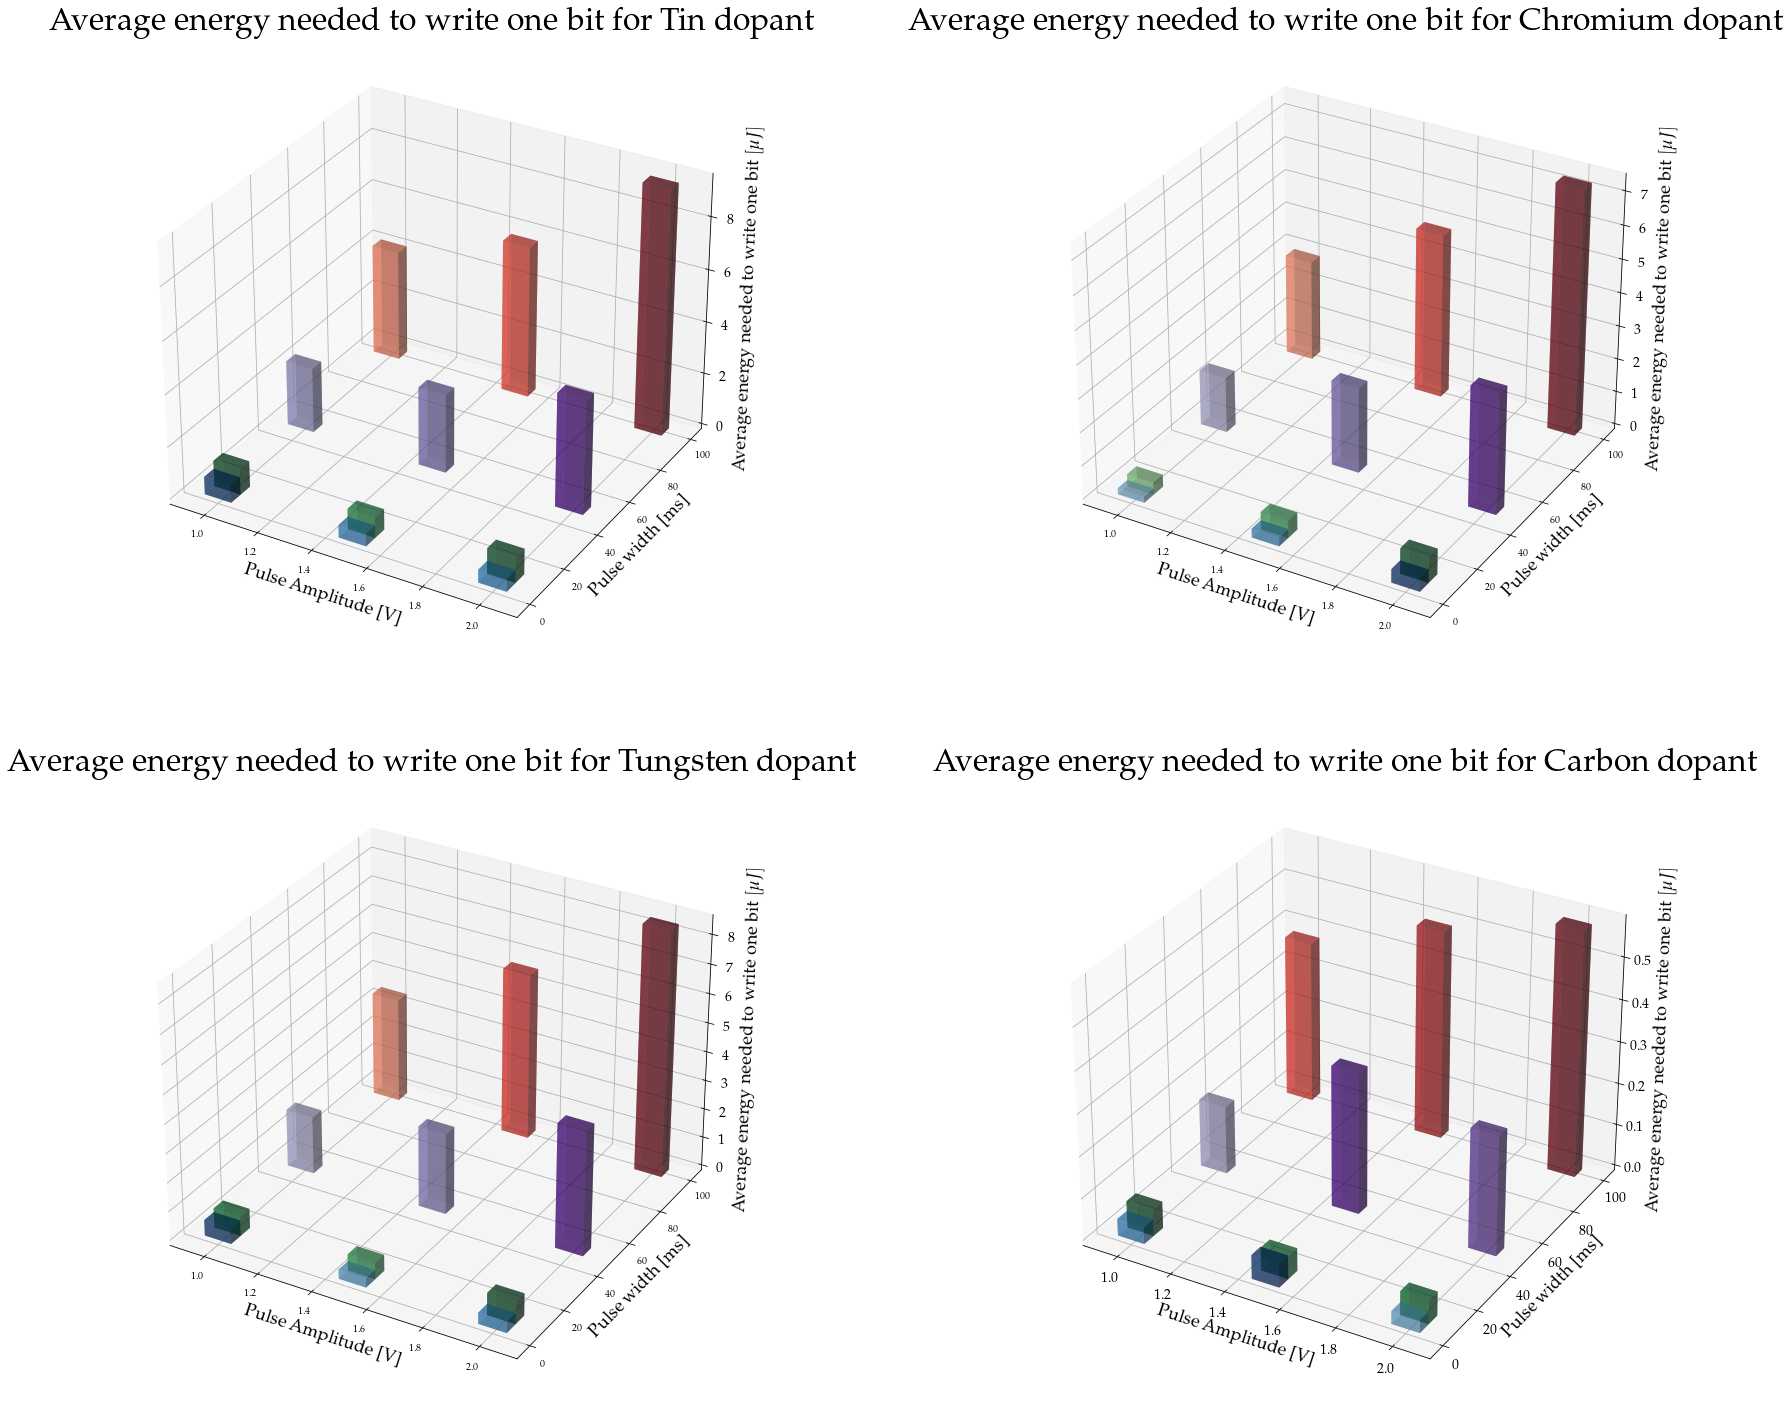

In [13]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
import matplotlib.cm as cm
#style.use('ggplot')


%matplotlib inline
dopants = ['Tin', 'Chromium', 'Tungsten', 'Carbon']
fig = plt.figure(figsize=(30,25))

ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')
axes = [ax1, ax2, ax3,ax4]


for idx, dopant in enumerate(dopants):
    ax1 = axes[idx]
    data2 = grouping.reset_index()
    data2 = data2.loc[data2['Dopant']==dopant ].reset_index()


    x3 = data2['Test_Amp']-0.05
    y3 = data2['Test_dt']*1000-5
    z3 = np.zeros( len(data2['Test_dt']))

    dx = np.ones(len(data2['Test_dt']))*0.1
    dy = np.ones(len(data2['Test_dt']))*5
    dz = data2['E_integrated']*1000 

    values = np.linspace(0.2, 1., len(data2['Test_dt']))
    cmaps = [cm.Blues, cm.Greens, cm.Reds, cm.Greens, cm.Greys]

    colors = cm.viridis(data2['E_integrated']/data2['E_integrated'].max())

    for idx,_ in enumerate(data2['E_integrated']):
        if data2.loc[idx,'Test_dt'] == 0.005:
            colors[idx] =cm.Blues( data2.loc[idx,'E_integrated']/data2.loc[data2['Test_dt'] == 0.005,'E_integrated'].max())
        elif data2.loc[idx,'Test_dt'] == 0.01:
            colors[idx] =cm.Greens( data2.loc[idx,'E_integrated']/data2.loc[data2['Test_dt'] == 0.01,'E_integrated'].max())
        elif data2.loc[idx,'Test_dt'] == 0.05:
            colors[idx] =cm.Purples( data2.loc[idx,'E_integrated']/data2.loc[data2['Test_dt'] == 0.05,'E_integrated'].max())
        else:
            colors[idx] =cm.Reds( data2.loc[idx,'E_integrated']/data2.loc[data2['Test_dt'] == 0.1,'E_integrated'].max())


    ax1.bar3d(x3, y3, z3, dx, dy, dz,shade=True,alpha=0.5, color=colors)

    #ax1.set_xticklabels(data2['Test_Amp'].unique())
    #ax1.set_yticklabels([ None, 5.,None ,  10.,None,  50.,None, 100.])

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    ax1.set_xlabel('Pulse Amplitude [V]',fontsize=18)
    ax1.set_ylabel('Pulse width [ms]',fontsize=18)
    ax1.set_zlabel('Average energy needed to write one bit $[\mu J ]$',fontsize=18)

    ax1.tick_params(axis='z', labelsize=14)
    ax1.set_title(f'Average energy needed to write one bit for {dopant} dopant',fontsize=32)




plt.savefig(f'3dbar.pdf',format='pdf')
plt.show()





/Users/karol/opt/anaconda3/lib/python3.9/site-packages/matplotlib/font_manager.py:1326: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  warnings.warn(


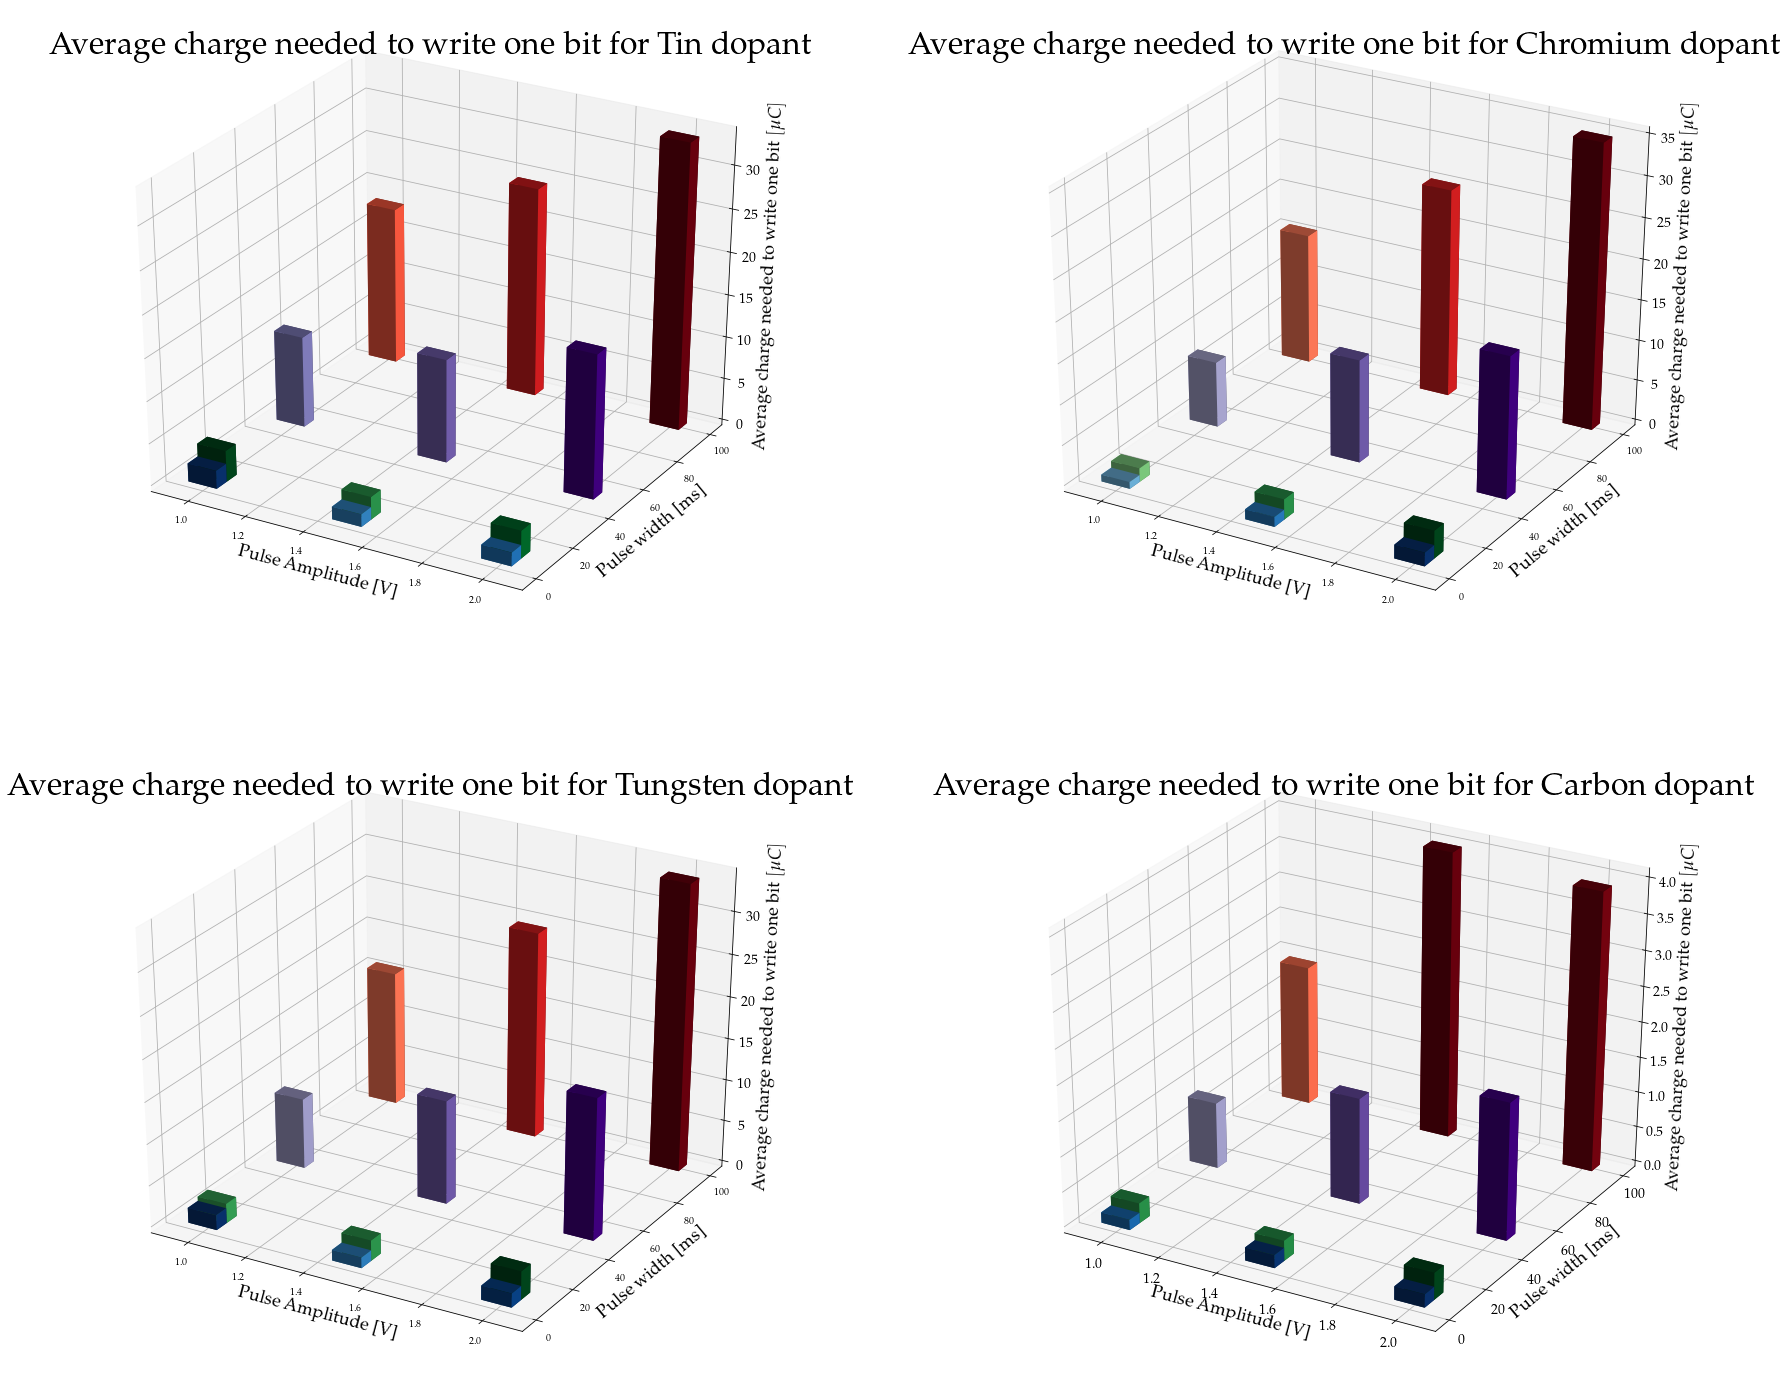

In [175]:
dopants = ['Tin', 'Chromium', 'Tungsten', 'Carbon']
fig = plt.figure(figsize=(30,25))

ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')
axes = [ax1, ax2, ax3,ax4]


for idx, dopant in enumerate(dopants):
    ax1 = axes[idx]
    data2 = grouping.reset_index()
    data2 = data2.loc[data2['Dopant']==dopant ].reset_index()


    x3 = data2['Test_Amp']-0.05
    y3 = data2['Test_dt']*1000-5
    z3 = np.zeros( len(data2['Test_dt']))

    dx = np.ones(len(data2['Test_dt']))*0.1
    dy = np.ones(len(data2['Test_dt']))*5
    dz = data2['Q_integrated']*1000 

    values = np.linspace(0.2, 1., len(data2['Test_dt']))
    cmaps = [cm.Blues, cm.Greens, cm.Reds, cm.Greens, cm.Greys]

    colors = cm.viridis(data2['Q_integrated']/data2['Q_integrated'].max())

    for idx,_ in enumerate(data2['Q_integrated']):
        if data2.loc[idx,'Test_dt'] == 0.005:
            colors[idx] =cm.Blues( data2.loc[idx,'Q_integrated']/data2.loc[data2['Test_dt'] == 0.005,'Q_integrated'].max())
        elif data2.loc[idx,'Test_dt'] == 0.01:
            colors[idx] =cm.Greens( data2.loc[idx,'Q_integrated']/data2.loc[data2['Test_dt'] == 0.01,'Q_integrated'].max())
        elif data2.loc[idx,'Test_dt'] == 0.05:
            colors[idx] =cm.Purples( data2.loc[idx,'Q_integrated']/data2.loc[data2['Test_dt'] == 0.05,'Q_integrated'].max())
        else:
            colors[idx] =cm.Reds( data2.loc[idx,'Q_integrated']/data2.loc[data2['Test_dt'] == 0.1,'Q_integrated'].max())


    ax1.bar3d(x3, y3, z3, dx, dy, dz,shade=True,alpha=0.5, color=colors)

    #ax1.set_xticklabels(data2['Test_Amp'].unique())
    #ax1.set_yticklabels([ None, 5.,None ,  10.,None,  50.,None, 100.])

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    ax1.set_xlabel('Pulse Amplitude [V]',fontsize=18)
    ax1.set_ylabel('Pulse width [ms]',fontsize=18)
    ax1.set_zlabel('Average charge needed to write one bit $[\mu C ]$',fontsize=18)

    ax1.tick_params(axis='z', labelsize=14)
    ax1.set_title(f'Average charge needed to write one bit for {dopant} dopant',fontsize=32)




plt.savefig(f'3dbar_charge.pdf',format='pdf')
plt.show()

In [9]:
dopants = concat_data['Dopant'].unique()
test_Amps = concat_data['Test_Amp'].unique()
test_dts = concat_data['Test_dt'].unique()
grouping['firstpulses'] = np.NAN
grouping['averaged_R_1stp'] = np.NAN
for dop in dopants:
    for amp in test_Amps:
        for dt in test_dts:
            filter = np.logical_and(concat_data['Dopant'] == dop, concat_data['Test_Amp'] == amp)
            filter = np.logical_and(filter, concat_data['Test_dt'] == dt)
            temp_data = concat_data[filter]
            temp_data1 = temp_data[temp_data["isSucces"]==True].groupby(by="Pulses").count()
            average_data = temp_data[temp_data["isSucces"]==True].groupby(by="Pulses").mean()
            print(temp_data)
            grouping.loc[dop].loc[amp].loc[dt,'firstpulses'] = temp_data1.loc[1,'R']
            grouping.loc[dop].loc[amp].loc[dt,'averaged_R_1stp'] = average_data.loc[1,'R']


             Time  Pulses  Tests          R  isSucces  dt_Ron  Amp_Ron  \
0    1.681775e+09       0      0  55.613912     False     0.1     -2.5   
1    1.681775e+09       1      0   1.015113      True     0.1      2.0   
2    1.681775e+09       0      0  32.196201     False     0.1     -2.5   
3    1.681775e+09       1      1   1.061309      True     0.1      2.0   
4    1.681775e+09       0      1  44.006171     False     0.1     -2.5   
..            ...     ...    ...        ...       ...     ...      ...   
195  1.681775e+09       1     97   3.070839      True     0.1      2.0   
196  1.681775e+09       0     97  77.704372     False     0.1     -2.5   
197  1.681775e+09       1     98   2.693211      True     0.1      2.0   
198  1.681775e+09       0     98  41.641507     False     0.1     -2.5   
199  1.681775e+09       1     99   3.278730      True     0.1      2.0   

            q  E_memristor  State  Test_Amp  Test_dt Dopant  Q_integrated  \
0   -0.010778     0.020878  R_off 

In [198]:
grouping

Time    Pulses      Tests  isSucces  \
Dopant   Test_Amp Test_dt                                                
Carbon   1.0      0.005    1.681898e+09  1.970000  49.500000       1.0   
                  0.010    1.681899e+09  1.750000  49.500000       1.0   
                  0.050    1.681900e+09  1.077922  38.000000       1.0   
                  0.100    1.682077e+09  1.170000  49.500000       1.0   
         1.5      0.005    1.682079e+09  1.510870  50.782609       1.0   
                  0.010    1.682080e+09  1.050000  49.500000       1.0   
                  0.050    1.682081e+09  1.121212  49.444444       1.0   
                  0.100    1.681902e+09  1.505263  49.747368       1.0   
         2.0      0.005    1.681903e+09  1.000000  49.500000       1.0   
                  0.010    1.681903e+09  1.000000  49.500000       1.0   
                  0.050    1.681904e+09  1.000000  49.500000       1.0   
                  0.100    1.681905e+09  1.010000  49.500000       1.0   
Chromium 1.0      0.005    1.681826e+09  1.130000  49.500000       1.0   
                  0.010    1.681827e+09  1.100000  49.500000       1.0   
                  0.050    1.681828e+09  1.040000  49.500000       1.0   
                  0.100    1.681829e+09  1.010000  49.500000       1.0   
         1.5      0.005    1.681829e+09  1.000000  49.500000       1.0   
                  0.010    1.681830e+09  1.000000  49.500000       1.0   
                  0.050    1.681831e+09  1.000000  49.500000       1.0   
                  0.100    1.681832e+09  1.000000  49.500000       1.0   
         2.0      0.005    1.681832e+09  1.000000  49.500000       1.0   
                  0.010    1.681833e+09  1.000000  49.500000       1.0   
                  0.050    1.681834e+09  1.000000  49.500000       1.0   
                  0.100    1.681835e+09  1.000000  49.500000       1.0   
Tin      1.0      0.005    1.681772e+09  3.298969  50.092784       1.0   
                  0.010    1.681769e+09  2.610526  48.905263       1.0   
                  0.050    1.681768e+09  1.430000  49.500000       1.0   
                  0.100    1.681767e+09  1.230000  49.500000       1.0   
         1.5      0.005    1.681771e+09  1.320000  49.500000       1.0   
                  0.010    1.681770e+09  1.150000  49.500000       1.0   
                  0.050    1.681773e+09  1.000000  49.500000       1.0   
                  0.100    1.681773e+09  1.000000  49.500000       1.0   
         2.0      0.005    1.681774e+09  1.000000  49.500000       1.0   
                  0.010    1.681774e+09  1.000000  49.500000       1.0   
                  0.050    1.681775e+09  1.000000  49.500000       1.0   
                  0.100    1.681775e+09  1.000000  49.500000       1.0   
Tungsten 1.0      0.005    1.681836e+09  2.706522  49.000000       1.0   
                  0.010    1.681837e+09  1.690000  49.500000       1.0   
                  0.050    1.681838e+09  1.130000  49.500000       1.0   
                  0.100    1.681839e+09  1.060000  49.500000       1.0   
         1.5      0.005    1.681840e+09  1.070000  49.500000       1.0   
                  0.010    1.681840e+09  1.000000  49.500000       1.0   
                  0.050    1.681842e+09  1.000000  50.000000       1.0   
                  0.100    1.681843e+09  1.000000  49.500000       1.0   
         2.0      0.005    1.681844e+09  1.000000  49.500000       1.0   
                  0.010    1.681845e+09  1.000000  50.000000       1.0   
                  0.050    1.681845e+09  1.000000  49.500000       1.0   
                  0.100    1.681846e+09  1.000000  49.500000       1.0   

                           dt_Ron  Amp_Ron         q  E_memristor  \
Dopant   Test_Amp Test_dt                                           
Carbon   1.0      0.005     0.005      1.0  0.000076     0.000020   
                  0.010     0.010      1.0  0.000162     0.000036   
                  0.050     0.050      1.0  0.000870     0

/Users/karol/opt/anaconda3/lib/python3.9/site-packages/matplotlib/font_manager.py:1326: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  warnings.warn(
/Users/karol/opt/anaconda3/lib/python3.9/site-packages/matplotlib/font_manager.py:1326: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  warnings.warn(


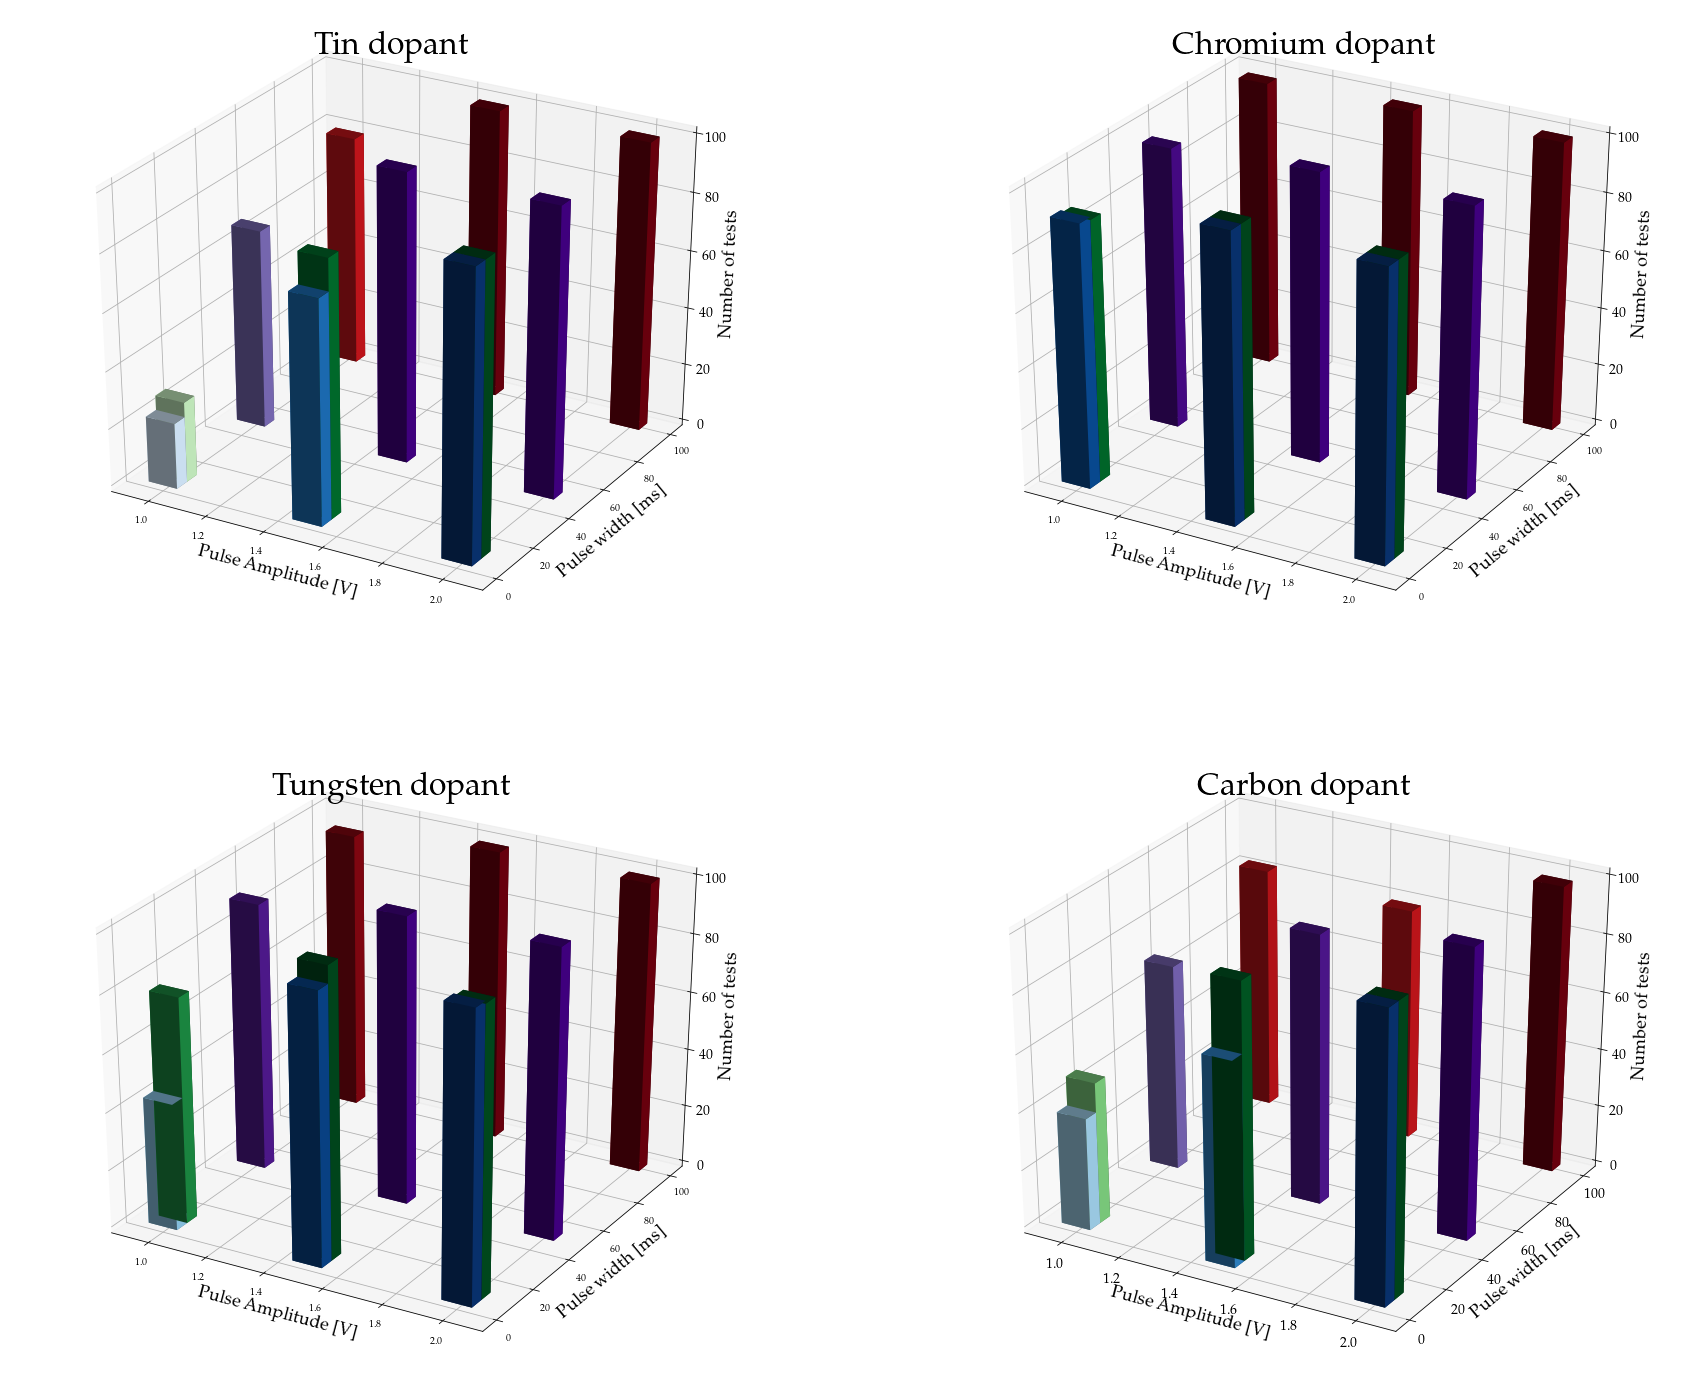

In [171]:
dopants = ['Tin', 'Chromium', 'Tungsten', 'Carbon']
fig = plt.figure(figsize=(30,25))

ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')
axes = [ax1, ax2, ax3,ax4]


for idx, dopant in enumerate(dopants):
    ax1 = axes[idx]
    data2 = grouping.reset_index()
    data2 = data2.loc[data2['Dopant']==dopant ].reset_index()


    x3 = data2['Test_Amp']-0.05
    y3 = data2['Test_dt']*1000-5
    z3 = np.zeros( len(data2['Test_dt']))

    dx = np.ones(len(data2['Test_dt']))*0.1
    dy = np.ones(len(data2['Test_dt']))*5
    dz = data2['firstpulses'] 

    values = np.linspace(0.2, 1., len(data2['Test_dt']))
    cmaps = [cm.Blues, cm.Greens, cm.Reds, cm.Greens, cm.Greys]

    colors = cm.viridis(data2['firstpulses']/data2['firstpulses'].max())

    for idx,_ in enumerate(data2['firstpulses']):
        if data2.loc[idx,'Test_dt'] == 0.005:
            colors[idx] =cm.Blues( data2.loc[idx,'firstpulses']/data2.loc[data2['Test_dt'] == 0.005,'firstpulses'].max())
        elif data2.loc[idx,'Test_dt'] == 0.01:
            colors[idx] =cm.Greens( data2.loc[idx,'firstpulses']/data2.loc[data2['Test_dt'] == 0.01,'firstpulses'].max())
        elif data2.loc[idx,'Test_dt'] == 0.05:
            colors[idx] =cm.Purples( data2.loc[idx,'firstpulses']/data2.loc[data2['Test_dt'] == 0.05,'firstpulses'].max())
        else:
            colors[idx] =cm.Reds( data2.loc[idx,'firstpulses']/data2.loc[data2['Test_dt'] == 0.1,'firstpulses'].max())


    ax1.bar3d(x3, y3, z3, dx, dy, dz,shade=True,alpha=0.5, color=colors)

    #ax1.set_xticklabels(data2['Test_Amp'].unique())
    #ax1.set_yticklabels([ None, 5.,None ,  10.,None,  50.,None, 100.])

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    ax1.set_xlabel('Pulse Amplitude [V]',fontsize=18)
    ax1.set_ylabel('Pulse width [ms]',fontsize=18)
    ax1.set_zlabel('Number of tests',fontsize=18)

    ax1.tick_params(axis='z', labelsize=14)
    ax1.set_title(f'{dopant} dopant',fontsize=32)




plt.savefig(f'3dbar_first_pulse.pdf',format='pdf')
plt.show()

In [187]:
concat_data.groupby('Pulses',as_index=False).mean()

,Pulses,Time,Tests,isSucces,dt_Ron,Amp_Ron,q,E_memristor,Test_Amp,Test_dt,Q_integrated,E_integrated
0,0,1.681860e+09,49.806020,0.000000,0.100000,-2.500000,-0.014340,0.019124,1.477146,0.041018,0.000000,0.000000
1,1,1.681851e+09,49.335288,0.884817,0.041213,1.502304,0.007994,0.001838,1.502304,0.041213,0.007994,0.001838
2,2,1.681849e+09,48.669091,0.576364,0.022109,1.092727,0.002053,0.000497,1.092727,0.022109,0.004078,0.001007
3,3,1.681843e+09,48.609442,0.351931,0.017661,1.105150,0.001441,0.000373,1.105150,0.017661,0.004295,0.001133
4,4,1.681842e+09,46.298013,0.251656,0.016159,1.105960,0.001144,0.000311,1.105960,0.016159,0.004554,0.001255
5,5,1.681848e+09,45.159292,0.221239,0.016637,1.115044,0.001115,0.000305,1.115044,0.016637,0.005553,0.001537
6,6,1.681856e+09,45.045455,0.227273,0.015511,1.119318,0.000929,0.000261,1.119318,0.015511,0.005555,0.001572
7,7,1.681859e+09,45.544118,0.102941,0.018162,1.132353,0.000972,0.000272,1.132353,0.018162,0.006784,0.001913
8,8,1.681862e+09,45.278689,0.245902,0.017787,1.139344,0.000966,0.000273,1.139344,0.017787,0.007708,0.002191
9,9,1.681872e+09,41.956522,0.195652,0.019348,1.163043,0.000968,0.000274,1.163043,0.019348,0.008706,0.002457


In [6]:
concat_data['R'] = pd.to_numeric(concat_data['R'],errors='coerce')

In [7]:
concat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11425 entries, 0 to 11424
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time          11425 non-null  float64
 1   Pulses        11425 non-null  int64  
 2   Tests         11425 non-null  int64  
 3   R             11424 non-null  float64
 4   isSucces      11425 non-null  bool   
 5   dt_Ron        11425 non-null  float64
 6   Amp_Ron       11425 non-null  float64
 7   q             11425 non-null  float64
 8   E_memristor   11425 non-null  float64
 9   State         11425 non-null  object 
 10  Test_Amp      11425 non-null  float64
 11  Test_dt       11425 non-null  float64
 12  Dopant        11425 non-null  object 
 13  Q_integrated  11425 non-null  float64
 14  E_integrated  11425 non-null  float64
dtypes: bool(1), float64(10), int64(2), object(2)
memory usage: 1.2+ MB


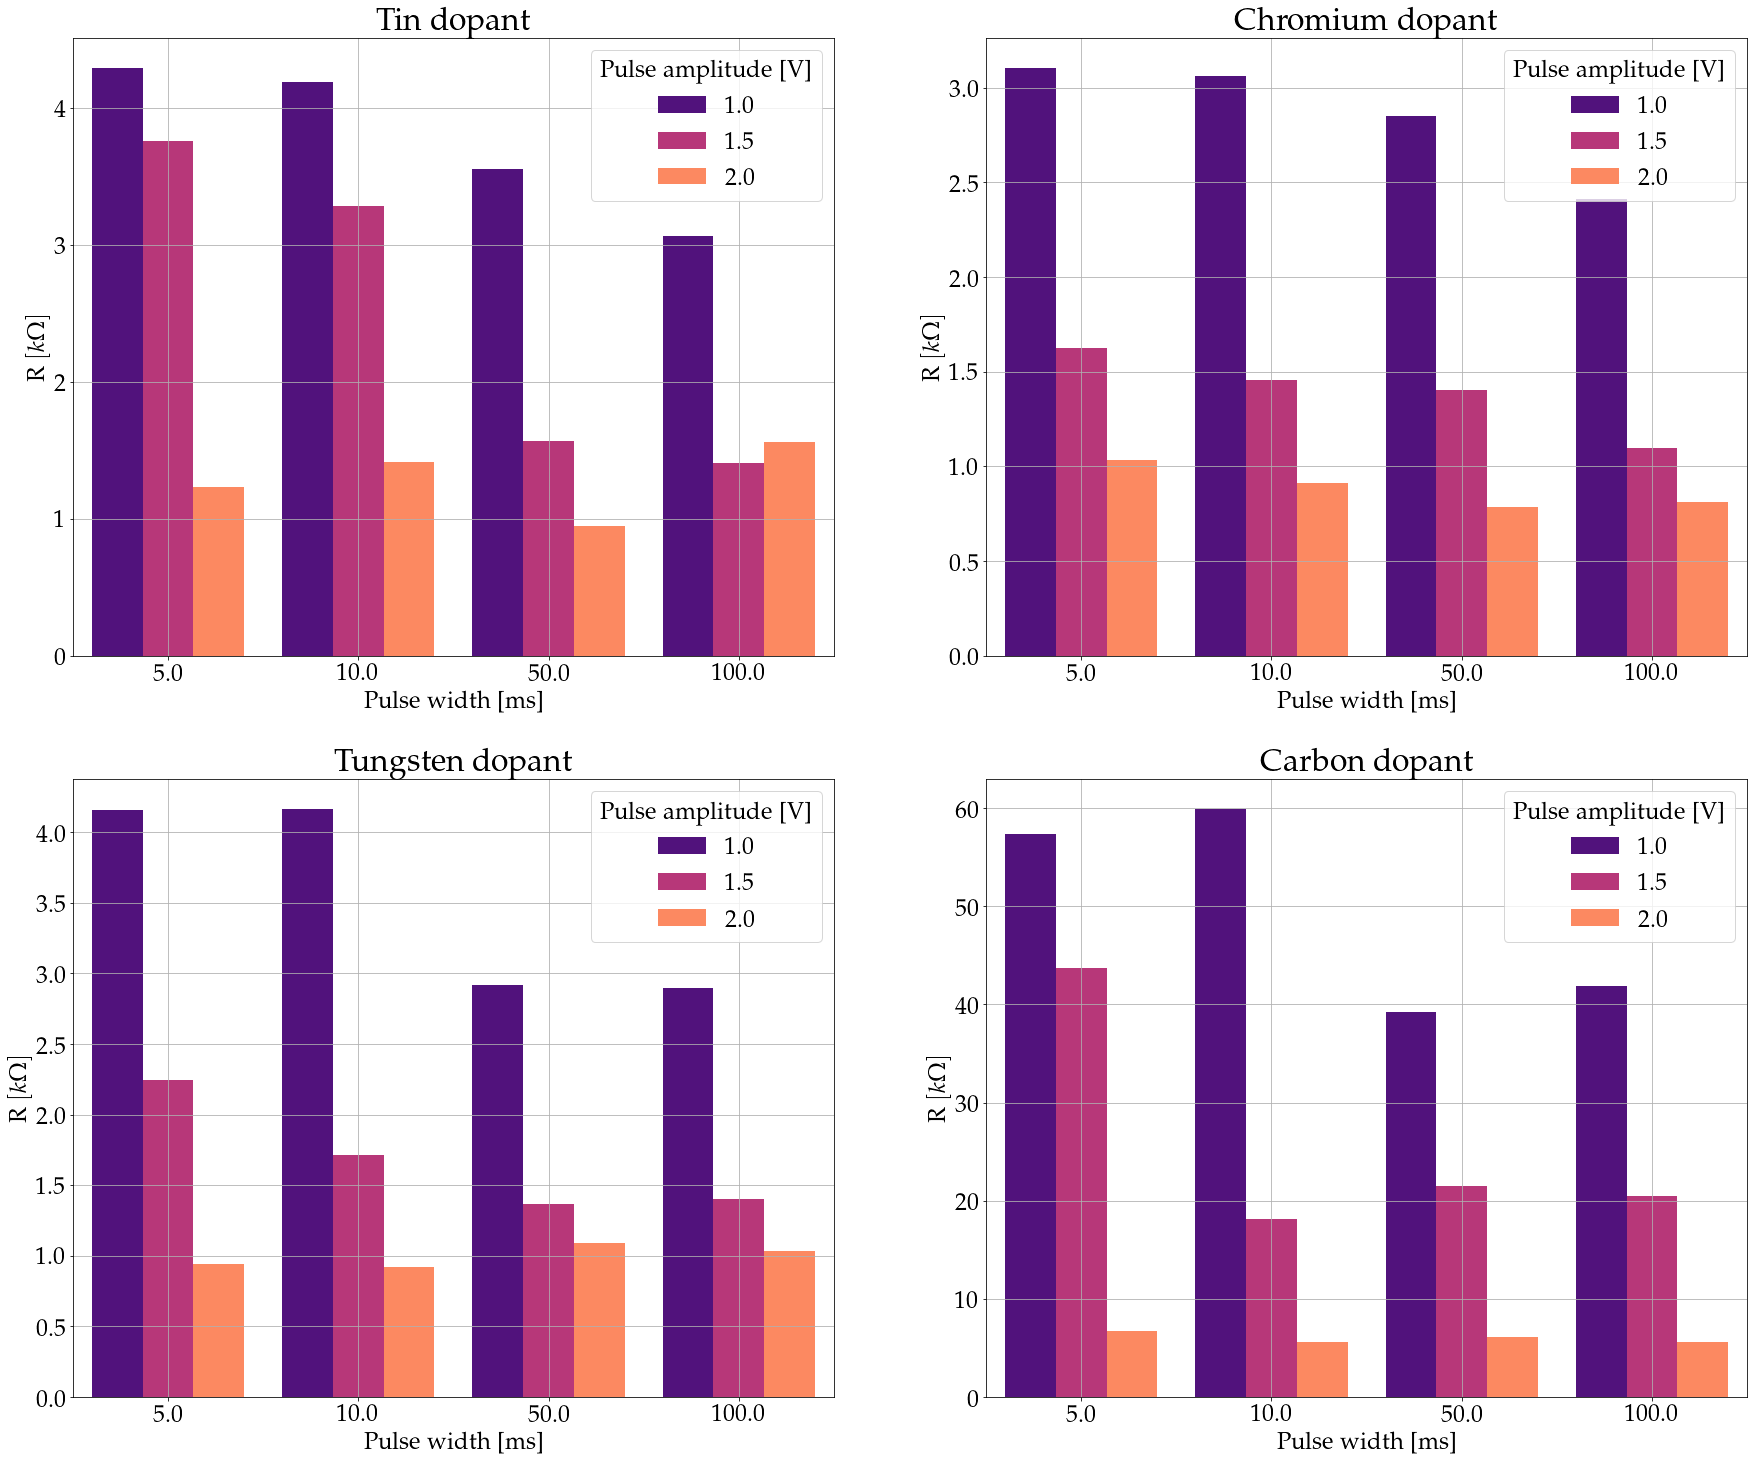

In [10]:
dopants = ['Tin', 'Chromium', 'Tungsten', 'Carbon']
fig = plt.figure(figsize=(30,25))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
axes = [ax1, ax2, ax3,ax4]


for idx, dopant in enumerate(dopants):
    ax1 = axes[idx]
    data2 = grouping.reset_index()
    data2 = data2.loc[data2['Dopant']==dopant ].reset_index()


    x3 = data2['Test_Amp']-0.05
    y3 = data2['Test_dt']*1000-5
    z3 = np.zeros( len(data2['Test_dt']))

    dx = np.ones(len(data2['Test_dt']))*0.1
    dy = np.ones(len(data2['Test_dt']))*5
    dz = data2['averaged_R_1stp'] 
    '''
    values = np.linspace(0.2, 1., len(data2['Test_dt']))
    cmaps = [cm.Blues, cm.Greens, cm.Reds, cm.Greens, cm.Greys]

    colors = cm.viridis(data2['averaged_R_1stp']/data2['averaged_R_1stp'].max())

    for idx,_ in enumerate(data2['firstpulses']):
        if data2.loc[idx,'Test_dt'] == 0.005:
            colors[idx] =cm.Blues( data2.loc[idx,'averaged_R_1stp']/data2.loc[data2['Test_dt'] == 0.005,'averaged_R_1stp'].max())
        elif data2.loc[idx,'Test_dt'] == 0.01:
            colors[idx] =cm.Greens( data2.loc[idx,'averaged_R_1stp']/data2.loc[data2['Test_dt'] == 0.01,'averaged_R_1stp'].max())
        elif data2.loc[idx,'Test_dt'] == 0.05:
            colors[idx] =cm.Purples( data2.loc[idx,'averaged_R_1stp']/data2.loc[data2['Test_dt'] == 0.05,'averaged_R_1stp'].max())
        else:
            colors[idx] =cm.Reds( data2.loc[idx,'averaged_R_1stp']/data2.loc[data2['Test_dt'] == 0.1,'averaged_R_1stp'].max())
    '''

    #ax1.bar3d(x3, y3, z3, dx, dy, dz,shade=True,alpha=1, color=colors)
    
    sns.barplot(ax=ax1 ,data =data2, x = data2['Test_dt']*1000,
            y= 'averaged_R_1stp', hue='Test_Amp', palette='magma',
            errcolor = 'black', errwidth = 2,
            capsize = 0.05,  saturation = 8)

    #ax1.set_xticklabels(data2['Test_Amp'].unique())
    #ax1.set_yticklabels([ None, 5.,None ,  10.,None,  50.,None, 100.])

    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    ax1.set_xlabel('Pulse width [ms]',fontsize=24)
    ax1.set_ylabel('R $[k \Omega]$',fontsize=24)
    #ax1.set_zlabel('R $[k \Omega]$',fontsize=18)
    ax1.tick_params(axis='x', labelsize=24)
    ax1.tick_params(axis='y', labelsize=24)
    ax1.set_title(f'{dopant} dopant',fontsize=32)
    ax1.legend(title='Pulse amplitude [V]', fontsize=24)
    ax1.grid()

plt.savefig(f'bar_first_pulse_resistance.pdf',format='pdf',)
plt.show()

In [207]:
grouping

Time    Pulses      Tests  isSucces  \
Dopant   Test_Amp Test_dt                                                
Carbon   1.0      0.005    1.681898e+09  1.970000  49.500000       1.0   
                  0.010    1.681899e+09  1.750000  49.500000       1.0   
                  0.050    1.681900e+09  1.077922  38.000000       1.0   
                  0.100    1.682077e+09  1.170000  49.500000       1.0   
         1.5      0.005    1.682079e+09  1.510870  50.782609       1.0   
                  0.010    1.682080e+09  1.050000  49.500000       1.0   
                  0.050    1.682081e+09  1.121212  49.444444       1.0   
                  0.100    1.681902e+09  1.505263  49.747368       1.0   
         2.0      0.005    1.681903e+09  1.000000  49.500000       1.0   
                  0.010    1.681903e+09  1.000000  49.500000       1.0   
                  0.050    1.681904e+09  1.000000  49.500000       1.0   
                  0.100    1.681905e+09  1.010000  49.500000       1.0   
Chromium 1.0      0.005    1.681826e+09  1.130000  49.500000       1.0   
                  0.010    1.681827e+09  1.100000  49.500000       1.0   
                  0.050    1.681828e+09  1.040000  49.500000       1.0   
                  0.100    1.681829e+09  1.010000  49.500000       1.0   
         1.5      0.005    1.681829e+09  1.000000  49.500000       1.0   
                  0.010    1.681830e+09  1.000000  49.500000       1.0   
                  0.050    1.681831e+09  1.000000  49.500000       1.0   
                  0.100    1.681832e+09  1.000000  49.500000       1.0   
         2.0      0.005    1.681832e+09  1.000000  49.500000       1.0   
                  0.010    1.681833e+09  1.000000  49.500000       1.0   
                  0.050    1.681834e+09  1.000000  49.500000       1.0   
                  0.100    1.681835e+09  1.000000  49.500000       1.0   
Tin      1.0      0.005    1.681772e+09  3.298969  50.092784       1.0   
                  0.010    1.681769e+09  2.610526  48.905263       1.0   
                  0.050    1.681768e+09  1.430000  49.500000       1.0   
                  0.100    1.681767e+09  1.230000  49.500000       1.0   
         1.5      0.005    1.681771e+09  1.320000  49.500000       1.0   
                  0.010    1.681770e+09  1.150000  49.500000       1.0   
                  0.050    1.681773e+09  1.000000  49.500000       1.0   
                  0.100    1.681773e+09  1.000000  49.500000       1.0   
         2.0      0.005    1.681774e+09  1.000000  49.500000       1.0   
                  0.010    1.681774e+09  1.000000  49.500000       1.0   
                  0.050    1.681775e+09  1.000000  49.500000       1.0   
                  0.100    1.681775e+09  1.000000  49.500000       1.0   
Tungsten 1.0      0.005    1.681836e+09  2.706522  49.000000       1.0   
                  0.010    1.681837e+09  1.690000  49.500000       1.0   
                  0.050    1.681838e+09  1.130000  49.500000       1.0   
                  0.100    1.681839e+09  1.060000  49.500000       1.0   
         1.5      0.005    1.681840e+09  1.070000  49.500000       1.0   
                  0.010    1.681840e+09  1.000000  49.500000       1.0   
                  0.050    1.681842e+09  1.000000  50.000000       1.0   
                  0.100    1.681843e+09  1.000000  49.500000       1.0   
         2.0      0.005    1.681844e+09  1.000000  49.500000       1.0   
                  0.010    1.681845e+09  1.000000  50.000000       1.0   
                  0.050    1.681845e+09  1.000000  49.500000       1.0   
                  0.100    1.681846e+09  1.000000  49.500000       1.0   

                           dt_Ron  Amp_Ron         q  E_memristor  \
Dopant   Test_Amp Test_dt                                           
Carbon   1.0      0.005     0.005      1.0  0.000076     0.000020   
                  0.010     0.010      1.0  0.000162     0.000036   
                  0.050     0.050      1.0  0.000870     0

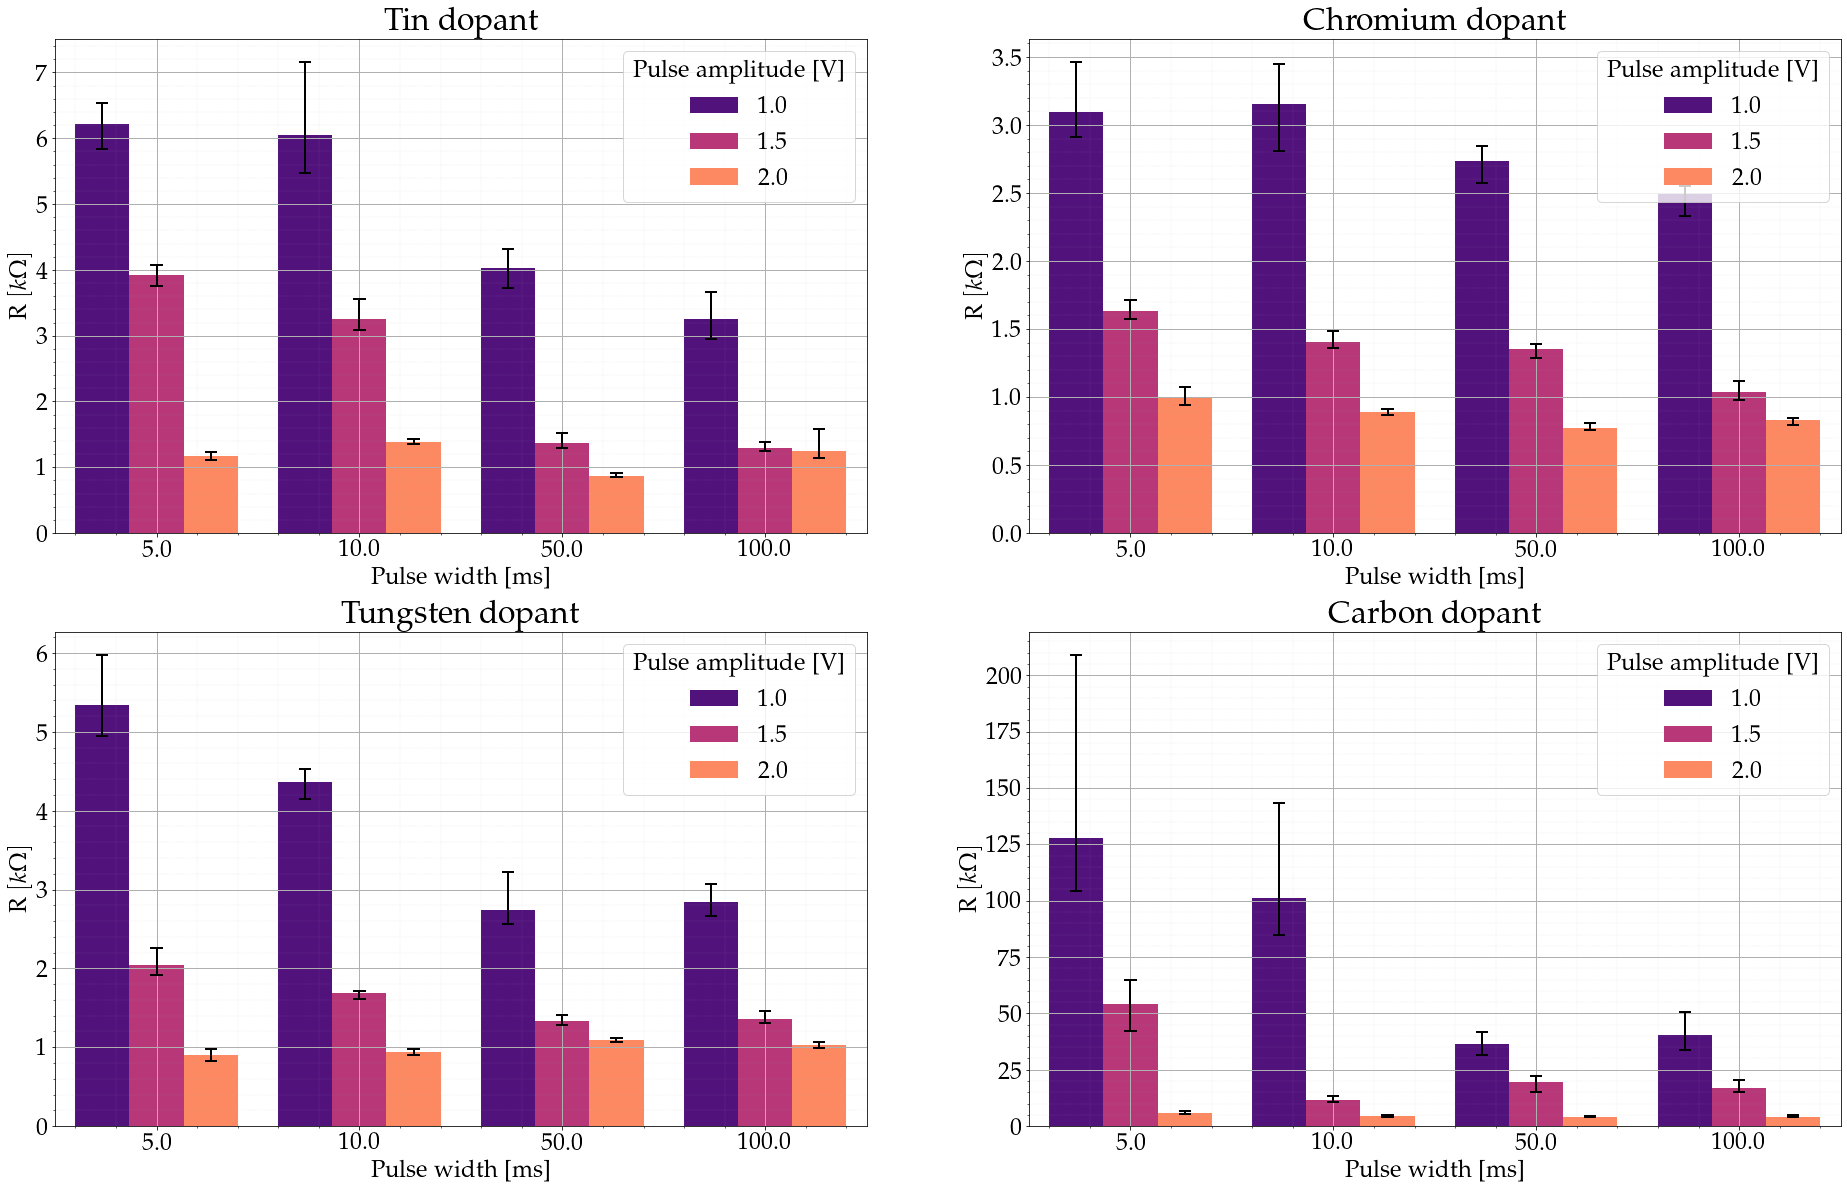

In [18]:
dopants = ['Tin', 'Chromium', 'Tungsten', 'Carbon']
fig = plt.figure(figsize=(32,20))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
axes = [ax1, ax2, ax3,ax4]


for idx, dopant in enumerate(dopants):
    ax1 = axes[idx]
    filter = np.logical_and(concat_data['Dopant']==dopant, concat_data['Pulses'] == 1)
    data2 = concat_data[filter]


    sns.barplot(ax=ax1 ,data =data2, x = data2['Test_dt']*1000,
            y= 'R', hue='Test_Amp', palette='magma',
            errcolor = 'black', errwidth = 2,
            capsize = 0.05,  saturation = 8, estimator=np.median)

    #ax1.set_xticklabels(data2['Test_Amp'].unique())
    #ax1.set_yticklabels([ None, 5.,None ,  10.,None,  50.,None, 100.])

    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    ax1.set_xlabel('Pulse width [ms]',fontsize=24)
    ax1.set_ylabel('R $[k \Omega]$',fontsize=24)
    #ax1.set_zlabel('R $[k \Omega]$',fontsize=18)
    ax1.tick_params(axis='x', labelsize=24)
    ax1.tick_params(axis='y', labelsize=24)
    ax1.set_title(f'{dopant} dopant',fontsize=32)
    ax1.legend(title='Pulse amplitude [V]', fontsize=24)
    ax1.ticklabel_format(axis = 'y', style = 'sci')
    ax1.grid(which = "major", linewidth = 1)
    ax1.grid(which = "minor", linewidth = 0.2, linestyle='dashed',alpha = 0.5)
    ax1.minorticks_on()




plt.savefig(f'bar_first_pulse_resistance.pdf',format='pdf',bbox_inches='tight')
plt.show()

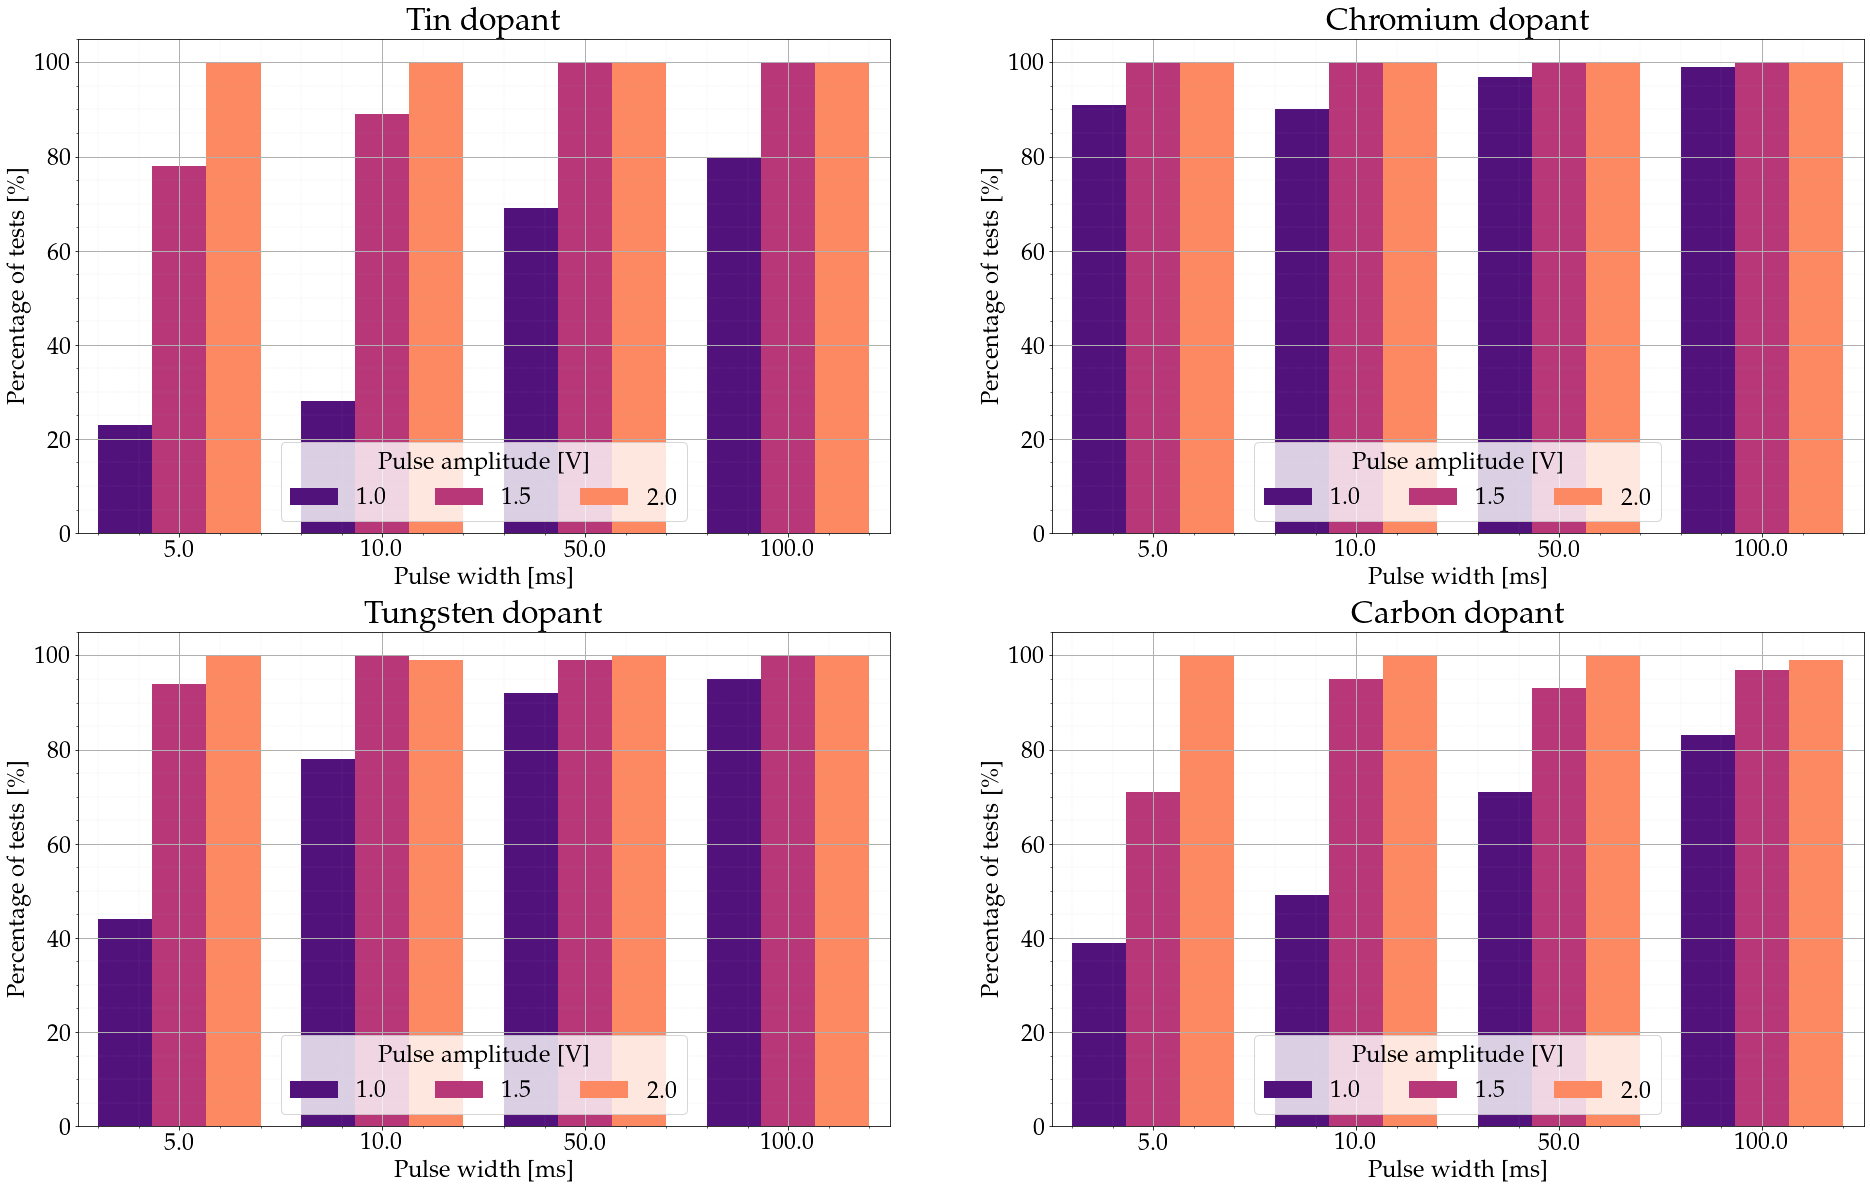

In [19]:
dopants = ['Tin', 'Chromium', 'Tungsten', 'Carbon']
fig = plt.figure(figsize=(32,20))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
axes = [ax1, ax2, ax3,ax4]


for idx, dopant in enumerate(dopants):
    ax1 = axes[idx]
    #filter = np.logical_and(grouping.loc['Dopant']==dopant)
    
    data2 = grouping.loc[dopant].reset_index()


    sns.barplot(ax=ax1 ,data =data2, x = data2['Test_dt']*1000,
            y= 'firstpulses', hue='Test_Amp', palette='magma',
            errcolor = 'black', errwidth = 2,
            capsize = 0.05,  saturation = 8)

    #ax1.set_xticklabels(data2['Test_Amp'].unique())
    #ax1.set_yticklabels([ None, 5.,None ,  10.,None,  50.,None, 100.])

    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    ax1.set_xlabel('Pulse width [ms]',fontsize=24)
    ax1.set_ylabel('Percentage of tests [\%]',fontsize=24)
    #ax1.set_zlabel('R $[k \Omega]$',fontsize=18)
    ax1.tick_params(axis='x', labelsize=24)
    ax1.tick_params(axis='y', labelsize=24)
    ax1.set_title(f'{dopant} dopant',fontsize=32)
    ax1.legend(title='Pulse amplitude [V]', fontsize=24, ncols = 3, loc='lower center')
    #ax1.set_ylim(0,120)
    ax1.ticklabel_format(axis = 'y', style = 'sci')
    ax1.grid(which = "major", linewidth = 1)
    ax1.grid(which = "minor", linewidth = 0.2, linestyle='dashed',alpha = 0.5)
    ax1.minorticks_on()
    




plt.savefig(f'bar_first_pulse.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [26]:
data2

,Test_Amp,Test_dt,Time,Pulses,Tests,R,isSucces,dt_Ron,Amp_Ron,q,E_memristor,Q_integrated,E_integrated,firstpulses,averaged_R_1stp
0,1.0,0.005,1.681898e+09,1.970000,49.500000,56.226446,1.0,0.005,1.0,0.000076,0.000020,0.000148,0.000040,39.0,57.305912
1,1.0,0.010,1.681899e+09,1.750000,49.500000,55.804696,1.0,0.010,1.0,0.000162,0.000036,0.000282,0.000064,49.0,59.914664
2,1.0,0.050,1.681900e+09,1.077922,38.000000,38.325538,1.0,0.050,1.0,0.000870,0.000150,0.000938,0.000162,71.0,39.269650
3,1.0,0.100,1.682077e+09,1.170000,49.500000,40.608272,1.0,0.100,1.0,0.001696,0.000329,0.001984,0.000386,83.0,41.915249
4,1.5,0.005,1.682079e+09,1.510870,50.782609,46.324524,1.0,0.005,1.5,0.000124,0.000037,0.000186,0.000057,71.0,43.734258
5,1.5,0.010,1.682080e+09,1.050000,49.500000,18.997497,1.0,0.010,1.5,0.000274,0.000051,0.000287,0.000054,95.0,18.109134
6,1.5,0.050,1.682081e+09,1.121212,49.444444,23.753425,1.0,0.050,1.5,0.001346,0.000294,0.001503,0.000336,93.0,21.474373
7,1.5,0.100,1.682439e+09,1.030000,49.500000,20.343790,1.0,0.100,1.5,0.002792,0.000484,0.002875,0.000499,97.0,20.438663
8,2.0,0.005,1.681903e+09,1.000000,49.500000,6.762378,1.0,0.005,2.0,0.000190,0.000030,0.000190,0.000030,100.0,6.762378
9,2.0,0.010,1.681903e+09,1.000000,49.500000,5.639582,1.0,0.010,2.0,0.000386,0.000057,0.000386,0.000057,100.0,5.639582


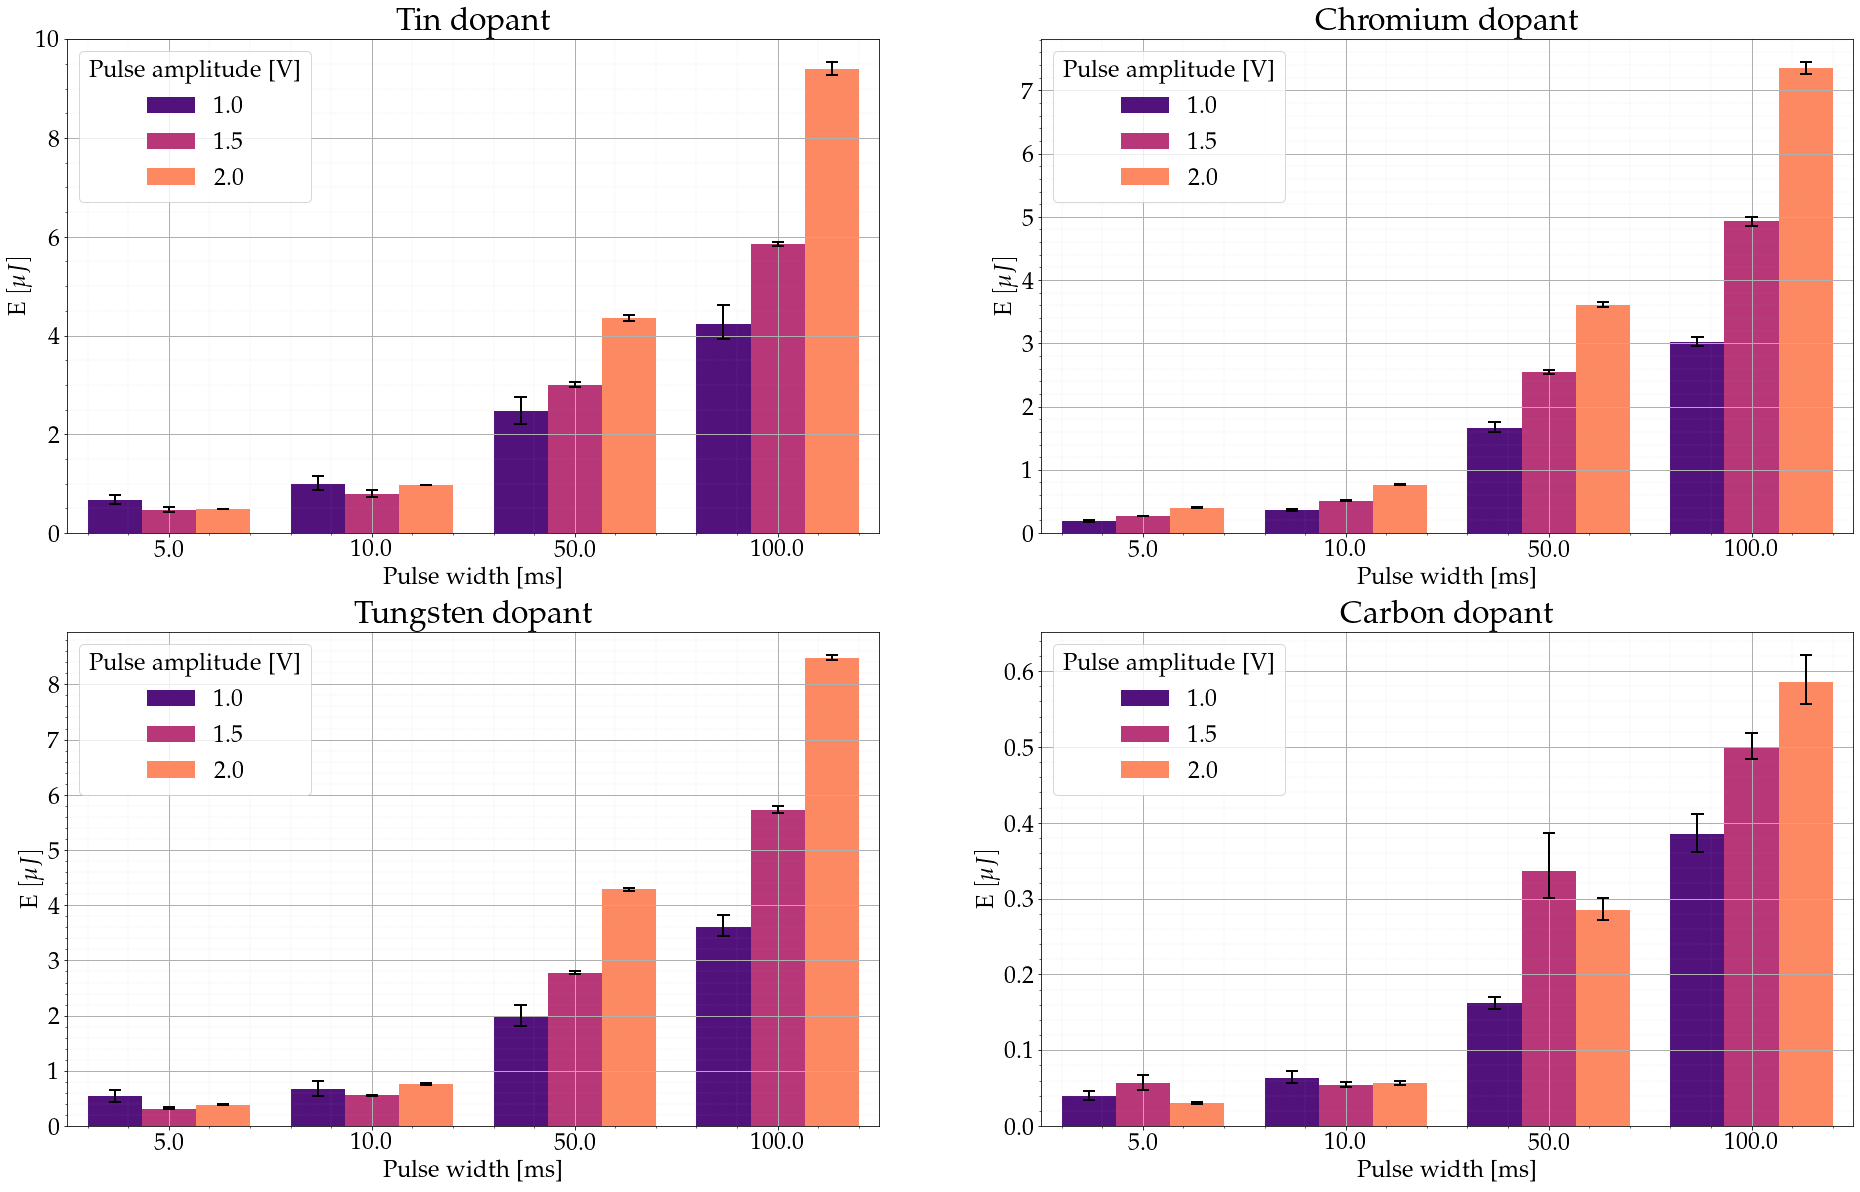

In [21]:
dopants = ['Tin', 'Chromium', 'Tungsten', 'Carbon']
fig = plt.figure(figsize=(32,20))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
axes = [ax1, ax2, ax3,ax4]


for idx, dopant in enumerate(dopants):
    ax1 = axes[idx]
    filter = np.logical_and(concat_data['Dopant']==dopant, concat_data['isSucces'] == 1)
    data2 = concat_data[filter]


    sns.barplot(ax=ax1 ,data =data2, x = data2['Test_dt']*1000,
            y= data2['E_integrated']*1000, hue='Test_Amp', palette='magma',
            errcolor = 'black', errwidth = 2,
            capsize = 0.05,  saturation = 8)

    #ax1.set_xticklabels(data2['Test_Amp'].unique())
    #ax1.set_yticklabels([ None, 5.,None ,  10.,None,  50.,None, 100.])

    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    ax1.set_xlabel('Pulse width [ms]',fontsize=24)
    ax1.set_ylabel('E $[\mu J]$',fontsize=24)
    #ax1.set_zlabel('R $[k \Omega]$',fontsize=18)
    ax1.tick_params(axis='x', labelsize=24)
    ax1.tick_params(axis='y', labelsize=24)
    ax1.set_title(f'{dopant} dopant',fontsize=32)
    ax1.legend(title='Pulse amplitude [V]', fontsize=24)
    ax1.ticklabel_format(axis = 'y', style = 'sci')
    ax1.grid(which = "major", linewidth = 1)
    ax1.grid(which = "minor", linewidth = 0.2, linestyle='dashed',alpha = 0.5)
    ax1.minorticks_on()



plt.savefig(f'bar_E_integrated.pdf',format='pdf',bbox_inches='tight')
plt.show()

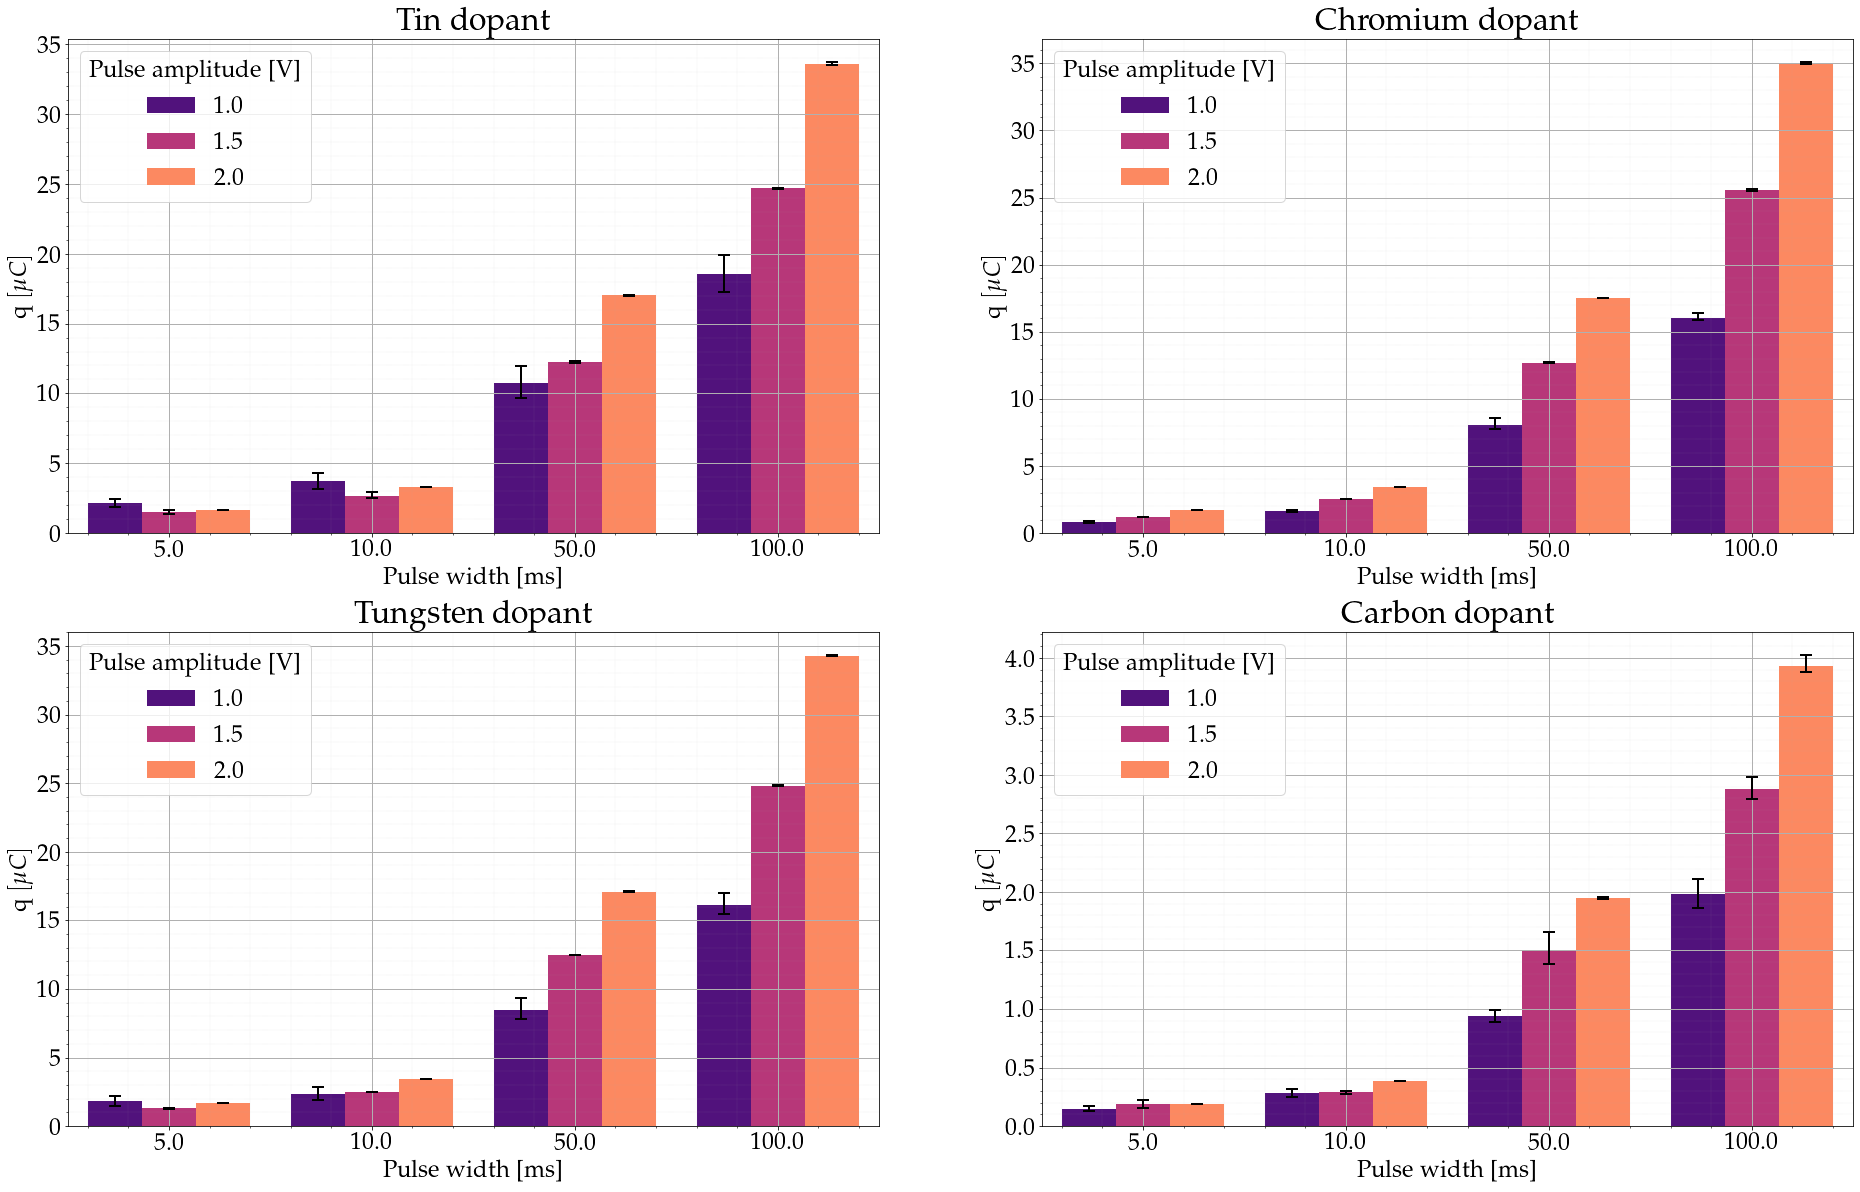

In [22]:
dopants = ['Tin', 'Chromium', 'Tungsten', 'Carbon']
fig = plt.figure(figsize=(32,20))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
axes = [ax1, ax2, ax3,ax4]


for idx, dopant in enumerate(dopants):
    ax1 = axes[idx]
    filter = np.logical_and(concat_data['Dopant']==dopant, concat_data['isSucces'] == 1)
    data2 = concat_data[filter]


    sns.barplot(ax=ax1 ,data =data2, x = data2['Test_dt']*1000,
            y= data2['Q_integrated']*1000, hue='Test_Amp', palette='magma',
            errcolor = 'black', errwidth = 2,
            capsize = 0.05,  saturation = 8)

    #ax1.set_xticklabels(data2['Test_Amp'].unique())
    #ax1.set_yticklabels([ None, 5.,None ,  10.,None,  50.,None, 100.])

    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    ax1.set_xlabel('Pulse width [ms]',fontsize=24)
    ax1.set_ylabel('q $[\mu C]$',fontsize=24)
    #ax1.set_zlabel('R $[k \Omega]$',fontsize=18)
    ax1.tick_params(axis='x', labelsize=24)
    ax1.tick_params(axis='y', labelsize=24)
    ax1.set_title(f'{dopant} dopant',fontsize=32)
    ax1.legend(title='Pulse amplitude [V]', fontsize=24)
    ax1.ticklabel_format(axis = 'y', style = 'sci')
    ax1.grid(which = "major", linewidth = 1)
    ax1.grid(which = "minor", linewidth = 0.2, linestyle='dashed',alpha = 0.5)
    ax1.minorticks_on()



plt.savefig(f'bar_Q_integrated.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [9]:
concat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11425 entries, 0 to 11424
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time          11425 non-null  float64
 1   Pulses        11425 non-null  int64  
 2   Tests         11425 non-null  int64  
 3   R             11424 non-null  float64
 4   isSucces      11425 non-null  bool   
 5   dt_Ron        11425 non-null  float64
 6   Amp_Ron       11425 non-null  float64
 7   q             11425 non-null  float64
 8   E_memristor   11425 non-null  float64
 9   State         11425 non-null  object 
 10  Test_Amp      11425 non-null  float64
 11  Test_dt       11425 non-null  float64
 12  Dopant        11425 non-null  object 
 13  Q_integrated  11425 non-null  float64
 14  E_integrated  11425 non-null  float64
dtypes: bool(1), float64(10), int64(2), object(2)
memory usage: 1.2+ MB


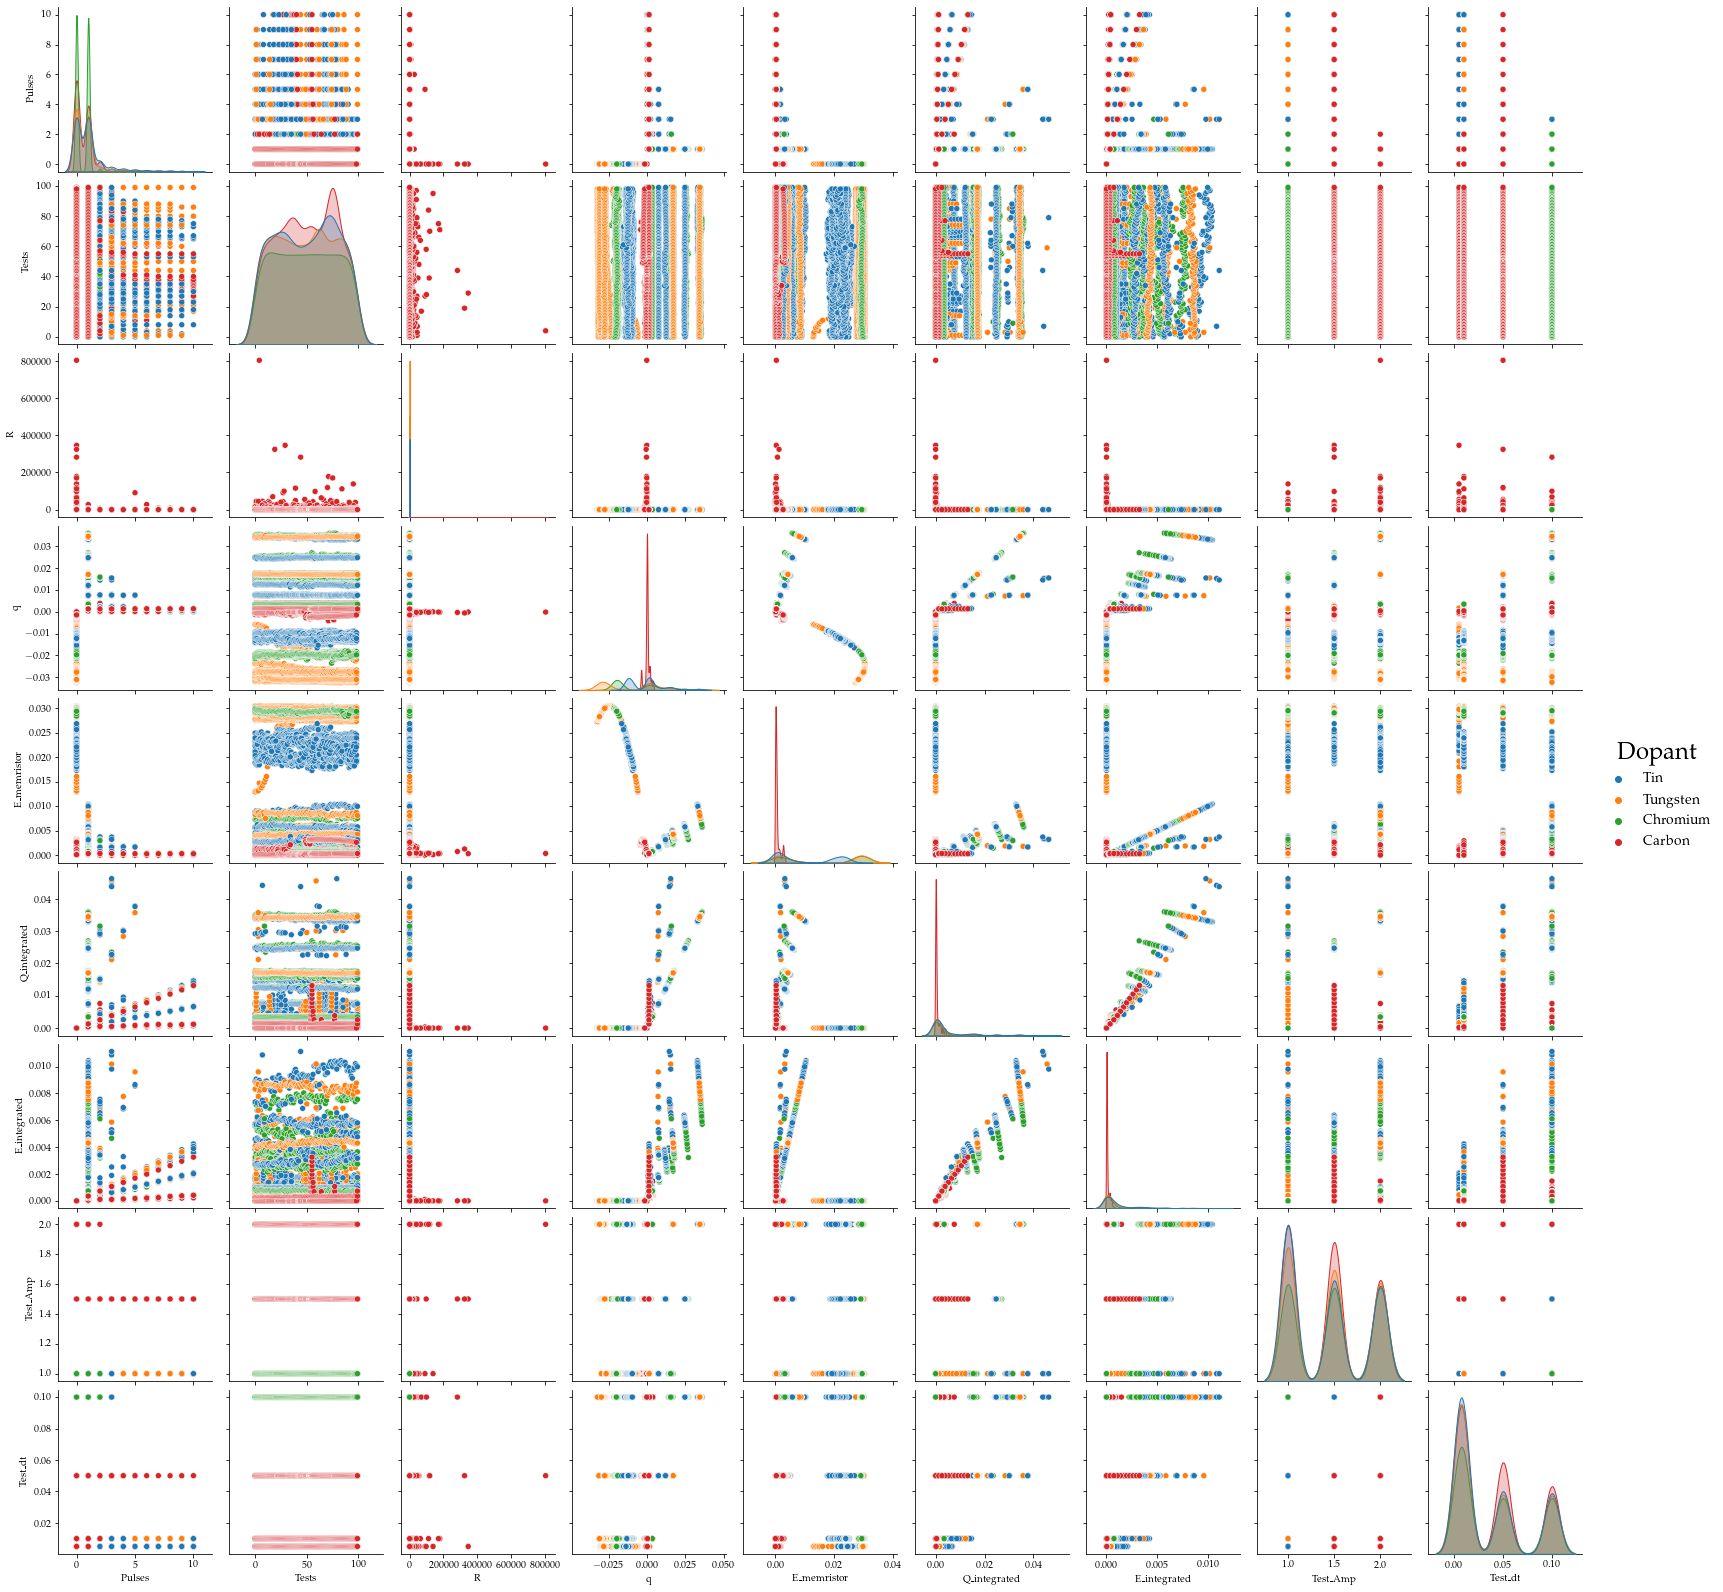

In [35]:
sns.pairplot(concat_data[['Pulses','Tests','R','q','E_memristor','Dopant','Q_integrated', 'E_integrated','Test_Amp',   'Test_dt'  ]], hue="Dopant")